# Webpage Classification: Utilizing Multi-Source Features and Domain Knowledge

**Research Highlight**
<div style='line-height:1.5;'>  

* _Multi-source features_ driven from multiple components/sources on webpages including URL, tags, textual content, and structural information.
* Injecting _domain-intensive knowledge_ into the multi-source features. 
* Comprehensive analysis of the multi-source domain-intensive features.   
* Outperformed advanced methods from the related literature in terms of _solution quality_ and _computational efficiency_.  

</div>

**Abstract:** 
<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;">Webpage classification has been dominated by text-based approaches which result in a substantial number of features. This complicates the model design and prevents a thorough analysis of the features to understand their contributions to the classification task. In this paper, we propose multi-source features and domain knowledge injection for webpage classifications where the features are extracted from diverse sources components on webpages, and domain knowledge is seamlessly incorporated. This approach results in highly relevant features, reduces the number of features by many orders of magnitude, decreases the model complexity, and proves effective. The experimental results show that the proposed approach outperforms competitive methods from the literature in both solution quality and computational effi- ciency despite relying on a basic model suggesting that the performance gain is due to the multi-source features and domain knowledge injection. Furthermore, a comprehensive analysis of the features demonstrates their relevance to the webpage classification and provides insights for future studies. </p>

## Problem Description

<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;">The academic webpages were estimated to be a small fraction of the entire web [1]. Therefore, the <i>automatic classification of academic webpages</i> is crucial. Previously, the manual classification of academic webpages was tried [2]. Unfortunately, the automatic classification of academic webpages forms a negligible fraction of the webpage classification literature and has been mostly ignored. In this paper, we set out to automatically identifies <i>staff-landing webpages</i> in academic websites. These webpages provides a list of all staff members but is not necessarly presented as a table or a list. These webpages are the entry point for focused crawlers intended to harvest staff-related information such as their names, titles, academic positions, publications, collaboration, ORCiD, Google Scholar profiles, etc.
</p>

<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;">The classification problem chosen in this study has practical value and is relevant to scientometric research [3] that often requires reliable data pertaining to publications, authors, and their affiliations. Such data can be found in the major bibliometric databases such as the CA Web of Science and Elsevier’s Scopus. However, their coverage varies by field and relies on an expectation that the targeted journals and conference proceedings are indexed [4]. Researcher profile pages can be used to track researchers’ publication history, professional memberships, titles, graduation information, collaboration networks, research interests, funding sources, and biographical information. Such information can be used to supplement traditional bibliometric databases and facilitate answering scientometric questions</p>

## Novelty
<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;">In this work, we opted to enrich webpage classification by computing features from a wide spectrum of sources and incorporating domain-specific knowledge. These sources/components include the textual content, URL, HTML tags, and structural information. The rationale behind combining features from multiple webpage components stems from two observations. First, each component offers a unique perspective on the webpage. Second, the irregularity of the web content prevents relying solely on a single feature. Therefore, the integration of features from various components on the webpage is anticipated to rectify the limitations of individual features while capitalizing on their combined strengths. Furthermore, we have strengthened these features by integrating domain-specific knowledge about the classification task. Remarkably, in a recent survey on webpage classification [5], the utilization of different components of the webpages and the injection of domain-intensive knowledge are identified as areas that have not received sufficient attention.

## Dataset

<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;">The dataset was collected manually from over 700 departments/centers across 11 South African universities. The dataset contains 1428 records and has two fields: the URL which was used to fetch the webpage content using a crawler and the category which is the label assigned to the webpage. The label can either be 1 indicating a staff-landing webpage (positive category) or 0 otherwise (negative category).</p>

## Results
<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 100px;"> Unlike several studies on webpage classification that compare their proposed approach with authors-implemented baseline classifiers, we compare our approach with the state-of-the-art methods from the related literature. The methods are cited and described in our manuscript. The proposed approach outperforms the competing methods in terms of <i>solution quality and computational efficiency</i>. We also analyze the multi-soruce domain-intensive features to better understand their contribution and assess the contribution of different HTML components on the webpage classification. 

## References
<div style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">

<p style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">
[1] S. D. Gollapalli, C. L. Giles, P. Mitra, C. Caragea, On identifying academic homepages for digital libraries, in: Proceedings of the 11th annual international ACM/IEEE joint conference on Digital libraries, 2011, pp. 123–132.</p>
<p style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">
[2] M. Thelwall, Extracting macroscopic information from web links, Journal of the American Society for Information Science and Technology 52 (13) (2001) 1157–1168.</p>
<p style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">
[3] J. Mingers, L. Leydesdorff, A review of theory and practice in scientometrics, European journal of operational research 246 (1) (2015) 1–19.</p>
<p style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">  
[4] S. Mahdi, P. d’Este, A. Neely, Citation counts: Are they good predictors of rae scores? a bibliometric analysis of rae 2001, A Bibliometric Analysis of RAE (2001).</p>
<p style="line-height:1.5; text-align: justify; padding-left: 10px; padding-right: 100px;">
[5] M. Hashemi, Web page classification: a survey of perspectives, gaps, and future directions, Multimedia Tools and Applications 79 (17-18) (2020) 11921–11945.</p>
</div>

<hr>

# Table of Content

<div style="line-height:2; text-align: justify; padding-left: 10px; padding-right: 50px;">

<ul>
<li><a href='#dp'>Data Preparation</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#method'>Classification with Multi-Source Domain-Intensive Features</a></li>
<li><a href='#cuwtc'>Classification Using Web Textual Content</a></li>
<ul>
<li><a href='#svc'>SVC</a></li>
<li><a href='#wpcm'>WPCM</a></li>
<li><a href='#google'>Google Text Classification</a></li>
</ul>
<li><a href='#cv'>Cross-Validation Computational Time</a></li>
</ul>

</div>

<hr>

In [1]:
import os 
import time 
import multiprocessing as mp
from functools import partial

import numpy as np

# HTML parsing
from bs4 import BeautifulSoup 

# DB
import psycopg2

# Data handling
import pandas as pd

# Text processing 
import re 
import spacy
nlp = spacy.load('en_core_web_sm')

# Visualization
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from wordcloud import WordCloud
plt.style.use('ggplot')

# Copying sklearn estimators
from sklearn.base import clone 
# Copying non-sklearn estimators
import copy 

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer

# Sklearn text feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, RFE, chi2, f_classif

# Feature reduction
from sklearn.decomposition import PCA

# Classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier

# For custom estimators
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.exceptions import NotFittedError

# Pipelines
from sklearn.pipeline import Pipeline 

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# TensorFlow to replicate Google Text Classification Guide
import tensorflow as tf
from tensorflow import keras 

# Wrapping tensorflow models into scikit-learn classifier. Useful for gridsearchcv, etc
from scikeras.wrappers import KerasClassifier
import warnings

# Suppress annoying warnings
# warnings.filterwarnings("ignore")

# Suppress tensorflow warning
from tensorflow import get_logger
get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore", message="Setting the random state for TF")

# Set pandas display
pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

2023-10-05 09:59:12.279332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.chdir('/home/ahmed/CREST/Projects/ML_WebClassif/result_dir')

In [3]:
# Set the random number generator seed for reproducibility
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [4]:
# Most of the related studies in the iterature used f1 score
scoring = 'f1_macro'
# Number of idependent run to evaluate stochastic methods
num_runs = 21
# Seed for the runs
seeds = np.random.randint(0, 2**32 - 1, size=num_runs)
# Number of runs to execute in parallel
n_jobs = 4 # use -1 to utilize all CPUs

<p style="line-height:1.5; text-align: justify; padding-left: 20px; padding-right: 50px;"><strong>Note</strong>: Unfortunately, I have seen several academic papers that follow a questionable practice by fixing a seed for the random number generator and performing just <strong>one</strong> run! What if this one run is a random luck! We need establish the statistical siginificance of the results. The motive for fixing the seed is to ensure the reproducibility. However, you can achieve that by fixing the seed and generate multiple seeds where each new seed will be used to perform an independent run. The final performance of the classifier will be measured by the average, median, etc. This is a much sound scienftific approach.</p>

In [5]:
# Define functions to measure the performance using independent runs to establish the statistical 
# significance of the results. This is crucial since the classifiers used in this project are 
# *stochastic* and produce different results for different runs

class Score:
    """A simple class to wrap scores"""
    def __init__(self) -> None:
        self.precision: np.ndarray = None 
        self.recall: np.ndarray = None
        self.f1: np.ndarray = None 
        self.accuracy: float = None


def get_score(y_test, y_pred):
    """Returns a score object"""
    score = Score()
    score.precision = precision_score(y_test, y_pred, average=None)
    score.recall = recall_score(y_test, y_pred, average=None)
    score.f1 = f1_score(y_test, y_pred, average=None)
    score.accuracy = accuracy_score(y_test, y_pred, normalize=True)
    return score


def set_estimator_seed(est, seed):
    """Set the seed for the random number generator a stochastic estimator"""

    # NOTE In Linux, the default start method in  multiprocessing is fork. Therefore, the modules will
    # be inherited from the parent process when forking child/worker processes. We need to change 
    # their seed in the child processes
    import numpy as np 
    import tensorflow as tf 
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    # Set the seed for every stochastic estimator in the pipeline
    if isinstance(est, Pipeline):
        for step in est:
            if hasattr(step, 'random_state'):
                setattr(step, 'random_state', seed)
        return
    
    if hasattr(est, 'random_state'):
        setattr(est, 'random_state', seed)

# Method run by the worker processes 
def run_estimator(est, seed, X_train, X_test, y_train, y_test):
    """Every process will get a copy of the estimator, a seed, and it evaluates it"""

    set_estimator_seed(est, seed)
    
    est.fit(X_train, y_train)

    y_pred = est.predict(X_test)

    score = get_score(y_pred, y_test)

    return score

    
def evaluate_estimator(est, X_train, X_test, y_train, y_test, parallel=True):
    """Evaluate an estimator using N independent runs where N is determined by `num_runs`"""

    # If the classifier is deterministic, do one run
    if not isinstance(est, Pipeline) and not hasattr(est, 'random_state') \
        or (isinstance(est, Pipeline) and not any(hasattr(step, 'random_state') for step in est)):

        print("Deterministic Estimator")
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        score = get_score(y_test, y_pred)
        return [score] * num_runs # always returns a list for  consistency!

    print("Stochastic Estimator")

    if not parallel:
        print("Running sequentially")
        # For some reason, distributing the runs does not work with `scikeras` wrappers
        # NOTE investigate this!
        
        scores = []
        for idx, seed in enumerate(seeds):
            score = run_estimator(est, seed, X_train, X_test, y_train, y_test)
            scores.append(score)
            # Crude progress bar
            print("{}% - ".format(round(100*(idx+1)/len(seeds))), end='')
        print()
        return scores
    
    print("Running in parallel")
    
    # Prepare arguments by fixing all arguments except for the seed
    runner = partial(run_estimator, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

    local_njobs = os.cpu_count() if n_jobs < 0 else n_jobs
    local_njobs = min(local_njobs, num_runs)

    if isinstance(est, BaseEstimator):
        est_list = [clone(est, safe=True) for _ in range(len(seeds))]
    else:
        est_list = [copy.deepcopy(est) for _ in range(len(seeds))]
    
    args = zip(est_list, seeds.tolist())
    with mp.Pool(local_njobs) as pool:
        scores = pool.starmap(runner, args)
        
    return scores

<span style='line-height:1.5;'>**Caution:** the code above with `mp.pool` should be under `if __name__ = '__main__'` accroding to the official documentation so that the worker processes will work as expected. However, this code works just fine in Juypter Notebook in Linux (Ubuntu)! If you are using a different OS, you might need to confirm this code works as expected!</span>

In [6]:
# Measure the average cross-validation time as a function of the number of folds
def measure_cv_time(estimator, X, y, max_cv=10, n_runs=5):
    cv_times = []
    for cv in range(2, max_cv + 1):
        start = time.time()
        for _ in range(n_runs):
            # Use one processor to accurately measure the time
            _ = cross_val_score(estimator, X, y, cv=cv, scoring=scoring, n_jobs=1)
        duration = (time.time() - start)/n_runs
        cv_times.append(duration)

        # Crude progress bar
        print("{}% - ".format(round(100*cv/max_cv)), end='')
    print()
    return cv_times 

In [7]:
def print_classification_report(scores):
    """A custom function to print the classification report given a list of score objects"""

    # Metric per class
    precision = np.asarray([score.precision for score in scores]).mean(axis=0).round(2)
    recall = np.asarray([score.recall for score in scores]).mean(axis=0).round(2)
    f1 = np.asarray([score.f1 for score in scores]).mean(axis=0).round(2)

    classes = list(range(f1.size))
    print("{:<20}{:<20}{:<20}{:<20}".format('Class', 'Precision', 'Recall', 'F1'))
    for c in classes:
        print(f"{c:<20}{precision[c]:<20}{recall[c]:<20}{f1[c]:<20}")
    
    # Macro average
    print()
    print(f"{'Average accuracy':<20}{np.mean([score.accuracy for score in scores]).round(2)}")
    print(f"{'Average precision':<20}{np.mean(precision).round(2)}")
    print(f"{'Average recall':<20}{np.mean(recall).round(2)}")
    print(f"{'Average f1 score':<20}{np.mean(f1).round(2)}")

<h1 id="dp">Data Preparation</h1>

<span style='line-height: 1.5;'>The heuristics are calculated by a python script and written to a `csv` file. If you need a copy of the script, email me at <i>ahmedhassan@aims.ac.za</i>. Please refer to the paper for a detailed description of these heuristics.</span>

In [8]:
df = pd.read_csv('heuristic_results.csv')
df.head()

,Link,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings
0,https://www.sun.ac.za/english,0,0.00,0.40,0.40,0.20,0.00,1.00,0,0,3,4,1,5.00,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,5,1,0.00,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,26,1.00,0.71,0.35,0.65,0.00,0.12,0,0,8,121,1,26.00,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,11,1,0.00,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,0,0.00,0.75,0.00,0.00,0.00,0.25,0,0,3,14,2,2.00,0


In [9]:
# We have 14 features
df.shape

(1271, 15)

In [10]:
def checkna(df):
    """Count missing values and find their percentages."""
    try:
        df = df.replace({'None': np.nan})
    except: 
        pass
    dfsize = df.shape[0]
    colna = df.isnull().sum()
    ratio = 100*colna/dfsize
    missing_df = pd.DataFrame({'Total': colna, 'Percentage': ratio})
    missing_df.sort_values(by='Percentage', ascending=False, inplace=True)
    return missing_df

In [11]:
checkna(df)

,Total,Percentage
Link,0,0.00
RepStruc,0,0.00
RepStrucRatio,0,0.00
Name-Title,0,0.00
Name-JobTitle,0,0.00
Name-URL,0,0.00
Name-Email,0,0.00
Name-Image,0,0.00
Key-Title,0,0.00
Key-URL,0,0.00


In [12]:
df.dropna(inplace=True)
df.shape

(1271, 15)

#### Creating Target Label

In [13]:
df.drop_duplicates(subset=['Link'], keep='first', ignore_index=True, inplace=True)
df.shape

(1270, 15)

In [14]:
df.set_index('Link', inplace=True, verify_integrity=True)
df.head(1)

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings
Link,,,,,,,,,,,,,,
https://www.sun.ac.za/english,0,0.00,0.40,0.40,0.20,0.00,1.00,0,0,3,4,1,5.00,0


The target label are found in another file: `academic_websites.csv`

In [15]:
# Read the labels of the website
label_df = pd.read_csv('academic_websites.csv')
label_df.head()

,URL,Category
0,https://www.sun.ac.za/english,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,0


In [16]:
label_df.shape

(2040, 2)

In [17]:
label_df.drop_duplicates(subset=['URL'], keep='first', ignore_index=True, inplace=True)

In [18]:
label_df.shape

(2031, 2)

In [19]:
label_df.set_index('URL', inplace=True, verify_integrity=True)
label_df.head()

,Category
URL,
https://www.sun.ac.za/english,0
http://www.sun.ac.za/english/faculty/agri/agricultural-economics/staff-and-students,1
http://www.sun.ac.za/english/faculty/Pages/default.aspx,0
http://www.sun.ac.za/english/faculty/agri/agronomy/staff/academic-staff,1
http://www.sun.ac.za/english/faculty/agri/animal-science/contact-us,0


Now, both data frame have the same index, we can concatenate them on the index (URL) to create the target label using the inner join

In [20]:
df = pd.concat([df, label_df], axis=1, ignore_index=False, join='inner')
df.head()

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings,Category
https://www.sun.ac.za/english,0,0.00,0.40,0.40,0.20,0.00,1.00,0,0,3,4,1,5.00,0,0
http://www.sun.ac.za/english/faculty/agri/agricultural-economics/staff-and-students,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,5,1,0.00,1,1
http://www.sun.ac.za/english/faculty/Pages/default.aspx,26,1.00,0.71,0.35,0.65,0.00,0.12,0,0,8,121,1,26.00,0,0
http://www.sun.ac.za/english/faculty/agri/agronomy/staff/academic-staff,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,11,1,0.00,1,1
http://www.sun.ac.za/english/faculty/agri/animal-science/contact-us,0,0.00,0.75,0.00,0.00,0.00,0.25,0,0,3,14,2,2.00,0,0


In [21]:
df.shape

(1270, 15)

In [22]:
# Reset the index
df.reset_index(names='Link', inplace=True)
df.head()

,Link,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings,Category
0,https://www.sun.ac.za/english,0,0.00,0.40,0.40,0.20,0.00,1.00,0,0,3,4,1,5.00,0,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,5,1,0.00,1,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,26,1.00,0.71,0.35,0.65,0.00,0.12,0,0,8,121,1,26.00,0,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,11,1,0.00,1,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,0,0.00,0.75,0.00,0.00,0.00,0.25,0,0,3,14,2,2.00,0,0


In [23]:
df.rename(columns={'Category': 'Label'}, inplace=True)

In [24]:
df.index

RangeIndex(start=0, stop=1270, step=1)

#### Balance the data

In [25]:
counts = df.Label.value_counts()
counts

0    576
1    552
2    142
Name: Label, dtype: int64

In [26]:
# Discard records with label = 2 (personal staff webpages). The focus of the paper is the classification of staff-landing webpages.
df = df[df.Label != 2]
counts = df.Label.value_counts()
counts

0    576
1    552
Name: Label, dtype: int64

Note that `imbalanced-learn` python package should be used to deal with imbalanced data. Here, since the data is almost balanced and we only need to discard a few records, to discard a few records at random without losing much information

In [27]:
n_drops = counts[0] - counts[1]
# Drop excess records
freq_indexes = df[df.Label == 0].index
df.drop(freq_indexes[-n_drops:], axis=0, inplace=True)
# Recheck
df.Label.value_counts()

0    552
1    552
Name: Label, dtype: int64

In [28]:
# Reindexing
df.index = range(len(df))
df.index

RangeIndex(start=0, stop=1104, step=1)

In [29]:
df.head()

,Link,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings,Label
0,https://www.sun.ac.za/english,0,0.00,0.40,0.40,0.20,0.00,1.00,0,0,3,4,1,5.00,0,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,5,1,0.00,1,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,26,1.00,0.71,0.35,0.65,0.00,0.12,0,0,8,121,1,26.00,0,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,0,0.00,0.00,0.00,0.00,0.00,0.00,1,1,2,11,1,0.00,1,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,0,0.00,0.75,0.00,0.00,0.00,0.25,0,0,3,14,2,2.00,0,0


<h1 id='eda'>Exploratory Data Analysis</h1>

Split the data for exploratory analysis to prevent any insights gained to leak into the test data

Note that `stratify=df.Label.unique()` does not work. See <a href="https://stackoverflow.com/questions/48288367/valueerror-found-input-variables-with-inconsistent-numbers-of-samples"> Stack Overflow</a>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], 
                                                    df.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    stratify=df.iloc[:, -1], 
                                                    shuffle=True, 
                                                    random_state=random_state
                                                    )
# NOTE when given a dataframe, it will return a dataframe

In [31]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.reset_index(drop=True, inplace=True)

In [32]:
df_train.head()

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings,Label
0,0,0.00,0.60,0.60,0.50,0.00,0.25,0,0,5,12,1,4.00,0,0
1,13,1.00,0.95,0.79,0.46,0.00,0.08,0,1,3,3,1,13.00,1,1
2,2,0.29,0.86,0.86,0.86,0.00,0.43,0,1,4,5,0,0.00,0,1
3,11,0.48,0.26,0.48,0.52,0.65,1.00,1,1,8,16,0,0.00,1,1
4,0,0.00,1.00,0.50,0.50,0.00,0.50,1,1,2,8,4,2.00,0,1


In [33]:
df_train.index

RangeIndex(start=0, stop=772, step=1)

In [34]:
df_train.shape

(772, 15)

#### Summary Statistics

Separate the two categories to calculate their summary statistics

In [35]:
df0 = X_train[y_train == 0]
df1 = X_train[y_train == 1]

In [36]:
desc1 = df1.describe()
desc1

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings
count,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00
mean,9.77,0.38,0.79,0.56,0.43,0.16,0.34,0.78,0.95,5.99,37.15,8.61,7.68,0.77
std,13.73,0.26,0.29,0.34,0.30,0.25,0.32,0.41,0.22,2.95,47.40,12.14,13.19,0.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,0.18,0.75,0.30,0.17,0.00,0.08,1.00,1.00,4.00,9.00,1.00,0.92,1.00
50%,6.00,0.38,0.91,0.61,0.43,0.00,0.20,1.00,1.00,6.00,17.00,3.00,2.00,1.00
75%,13.00,0.57,1.00,0.86,0.70,0.35,0.61,1.00,1.00,8.00,49.00,12.00,9.38,1.00
max,190.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,16.00,416.00,131.00,117.00,1.00


In [37]:
desc0 = df0.describe()
desc0

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings
count,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00
mean,2.90,0.14,0.29,0.18,0.18,0.03,0.14,0.01,0.01,4.44,9.19,1.79,4.30,0.13
std,10.76,0.24,0.35,0.28,0.24,0.13,0.21,0.07,0.07,1.97,5.04,1.76,10.98,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,6.00,1.00,0.00,0.00
50%,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9.00,1.00,0.00,0.00
75%,1.75,0.25,0.53,0.33,0.33,0.00,0.25,0.00,0.00,6.00,13.00,2.00,3.00,0.00
max,145.00,1.00,1.00,1.00,0.92,1.00,1.00,1.00,1.00,11.00,25.00,23.00,103.00,1.00


Notice the difference between the summary of the results on the two categories. <span style='color:dodgerblue;'>This suggests that the multi-source domain-intensive features discriminate the two categories well.</span> Note that most of these features take values in [0,1]. The difference below can highlight this more:

In [38]:
(desc1 - desc0).loc[['mean', '50%'], :]

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings
mean,6.88,0.24,0.50,0.37,0.25,0.13,0.20,0.77,0.94,1.56,27.96,6.83,3.38,0.64
50%,6.00,0.38,0.83,0.61,0.43,0.00,0.20,1.00,1.00,2.00,8.00,2.00,2.00,1.00


#### Outliers

In [39]:
def is_outlier(dfx, k=1.5):
    """Find outliers based on the Tukey's fences"""
    outliers = pd.DataFrame()
    for col in dfx.columns:
        q1 = dfx[col].quantile(0.25)
        q3 = dfx[col].quantile(0.75)
        condition = (dfx[col] < q1 - k*(q3-q1)) | (dfx[col] > q3 + k*(q3-q1))
        outliers[col] = condition
    return outliers

In [40]:
outliers = is_outlier(df_train)
outliers.head()

,RepStruc,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Key-Title,Key-URL,Key-Page,Key-Page-Freq,Phone-Count,Name-Phone,Key-Headings,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
def count_outliers(outliers):
    counts = outliers.sum(axis=0)
    return pd.DataFrame({"Count": counts, "Percentage": counts/len(outliers)})

In [42]:
count_outliers(outliers)

,Count,Percentage
RepStruc,41,0.05
RepStrucRatio,0,0.00
Name-Title,0,0.00
Name-JobTitle,0,0.00
Name-URL,0,0.00
Name-Email,174,0.23
Name-Image,0,0.00
Key-Title,0,0.00
Key-URL,0,0.00
Key-Page,7,0.01


Most of the features do not have outliers except for `Name-Email`, `Key-Page-Freq`, `Phone-Count`, and `Name-Phone`. The outliers in these features can be justified by the lacking standard of what a staff-landing webpage should contain. For instance, some staff-landing webpage list the phone number of every person including the supporting teams while others do not.

In [43]:
def percentage_of_rows_with_n_outliers(outliers, num_outliers=1):
    return 100*round(len(outliers[outliers.sum(axis=1) >= num_outliers])/len(outliers), 2)

In [44]:
percentage_of_rows_with_n_outliers(outliers, num_outliers=1)

44.0

In [45]:
percentage_of_rows_with_n_outliers(outliers, num_outliers=5)

0.0

<span style='line-height:1.5;'>We can see that the percentage of rows with at least 1 outlier in it is 44% and this will drop to 0% for rows with at least 5 outliers. We will not filter the outliers out for the following reasons:</span>

<ul style='line-height:1.5;'>
<li> An example in the dataset (i.e. a row) is likely to be deterimental if it mostly contains outliers. However, since we are working on high dimensional spaces, having a few outliers will not be an issue for most of the machine learning models.</li> 
<li> We have a small dataset and removing outliers will severe data loss. </li>
</ul>

#### Correlation Analysis

In [46]:
def get_corr(dfx, threshold=0, col='Label'):
    """Compute the correlation between the features and the label"""
    corr_df = dfx.corr()
    # Take the absolute value since strongly negatively correlated features should be ranked at the top
    corr = corr_df[(corr_df[col].abs() > threshold)][[col]]
    corr = corr.sort_values(by=col, ascending=False)
    return corr

In [47]:
get_corr(df_train)

,Label
Label,1.00
Key-URL,0.94
Key-Title,0.79
Key-Headings,0.65
Name-Title,0.62
Name-JobTitle,0.52
RepStrucRatio,0.43
Name-URL,0.42
Key-Page-Freq,0.38
Phone-Count,0.37


In [48]:
def get_corr_features(df, threshold=0.2, pairwise_threshold=0.8, target='Label'):  
    """Get the feature that have a correlation coeff with the target variable above `threshold` and 
    have pairwise correlation coeff less than `pariwise_threshold`. In case the pairwise correlation
    coeff is higher than the threshold, keep the feature that has a higher correlation coeff with 
    the target variable"""

    corr = get_corr(df, threshold)
    corr_df = df.corr()
    corr_features = [f for f in corr.index]
    print(f"Number of features that have corr coeff above {threshold} is {len(corr_features)-1}")
    
    remove_set = set()
    remove_set.add(target)
    for f1 in corr_features:
        if f1 in remove_set:
            continue
        for f2 in corr_features:
            if f1 == f2 or f2 in remove_set: 
                continue
            if abs(corr_df[f1][f2]) > pairwise_threshold:
                # Remove the feature with the lower corr coeff with the target
                if abs(corr.loc[f1][0]) >= abs(corr.loc[f2][0]):
                    remove_set.add(f2)
                    print("Removing ", f2, " keeping ", f1)
                else:
                    remove_set.add(f1)
                    print("Removing ", f1, " keeping ", f2)
                    print(f2)
                break
    for f in remove_set: corr_features.remove(f)
    print("Number of features after filtering: ", len(corr_features))
    return corr_features

In [49]:
corr_features = get_corr_features(df_train, threshold=0.2, pairwise_threshold=0.8)
corr_features

Number of features that have corr coeff above 0.2 is 13
Removing  Key-Title  keeping  Key-URL
Number of features after filtering:  12


['Key-URL',
 'Key-Headings',
 'Name-Title',
 'Name-JobTitle',
 'RepStrucRatio',
 'Name-URL',
 'Key-Page-Freq',
 'Phone-Count',
 'Name-Image',
 'Name-Email',
 'Key-Page',
 'RepStruc']

In [50]:
corr_features = get_corr_features(df_train, threshold=0, pairwise_threshold=1.0)
corr_features.insert(0, 'Label')

Number of features that have corr coeff above 0 is 14
Number of features after filtering:  14


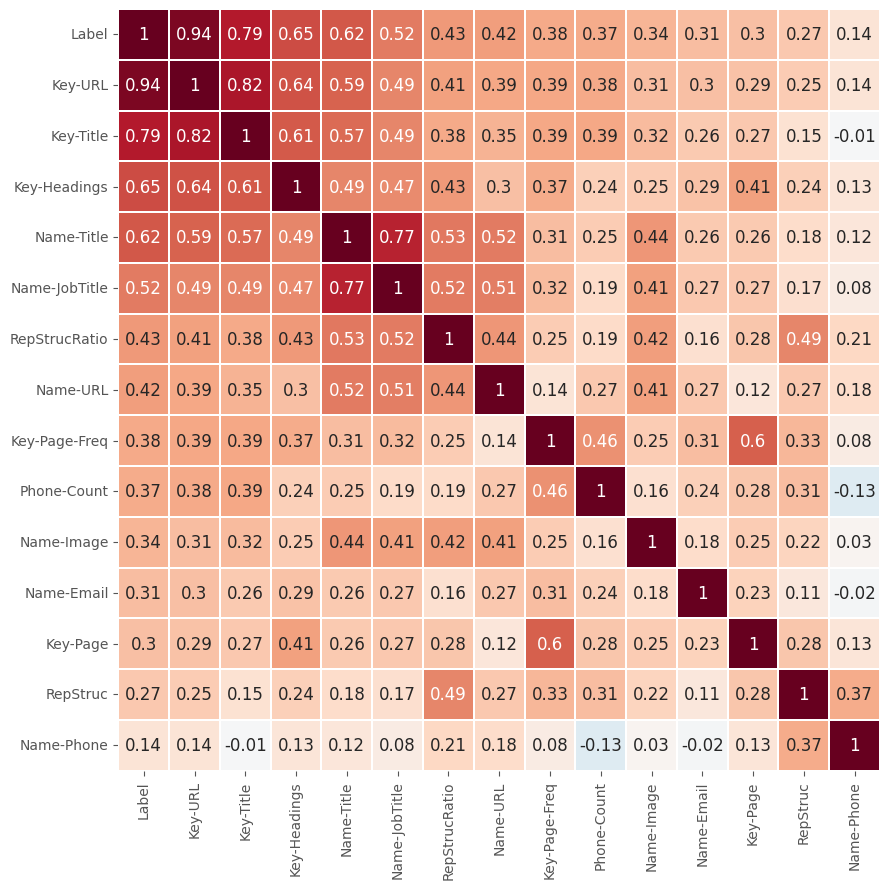

In [51]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(np.corrcoef(df_train[corr_features].values.T).round(2), square=True, linewidths=0.05, linecolor='white',
                annot=True, annot_kws={'size': 12}, xticklabels=corr_features, yticklabels=corr_features, 
                vmax=1, vmin=-1, cbar=False, cmap='RdBu_r')
plt.tight_layout()

#### Features Ranking

First discretize the numerical features for chisquare test by computing frequencies. Note some numerical features are binary which are left unchanged.

In [52]:
df_train.dtypes

RepStruc           int64
RepStrucRatio    float64
Name-Title       float64
Name-JobTitle    float64
Name-URL         float64
Name-Email       float64
Name-Image       float64
Key-Title          int64
Key-URL            int64
Key-Page           int64
Key-Page-Freq      int64
Phone-Count        int64
Name-Phone       float64
Key-Headings       int64
Label              int64
dtype: object

In [53]:
df_num = df_train.select_dtypes('float')
df_num.shape

(772, 7)

In [54]:
# Select some int columns that are not binary
columns_int = ['RepStruc', 'Key-Page', 'Key-Page-Freq', 'Phone-Count']
df_num = pd.concat([df_train[columns_int], df_num], axis=1)
df_num.shape

(772, 11)

In [55]:
df_num.head(2)

,RepStruc,Key-Page,Key-Page-Freq,Phone-Count,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Name-Phone
0,0,5,12,1,0.00,0.60,0.60,0.50,0.00,0.25,4.00
1,13,3,3,1,1.00,0.95,0.79,0.46,0.00,0.08,13.00


In [56]:
n_bins = 10
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_disc = discretizer.fit_transform(df_num)
df_disc = pd.DataFrame(X_disc, columns=df_num.columns)
df_disc.shape

(772, 11)

In [57]:
df_disc.head(2)

,RepStruc,Key-Page,Key-Page-Freq,Phone-Count,RepStrucRatio,Name-Title,Name-JobTitle,Name-URL,Name-Email,Name-Image,Name-Phone
0,0.00,3.00,0.00,0.00,0.00,5.00,5.00,5.00,0.00,2.00,0.00
1,0.00,1.00,0.00,0.00,9.00,9.00,7.00,4.00,0.00,0.00,1.00


In [58]:
df_copy = pd.concat([df_disc, df_train.loc[:, ~df_train.columns.isin(df_disc.columns)]], axis=1)
df_copy.shape

(772, 15)

In [59]:
# df_copy.drop('Label', axis=1, inplace=True)

In [60]:
# Just check we have discretized the variables correctly
for col in df_copy.columns:
    print("{:<20}{}".format(col, df_copy[col].unique().size))

RepStruc            8
Key-Page            10
Key-Page-Freq       8
Phone-Count         6
RepStrucRatio       10
Name-Title          10
Name-JobTitle       10
Name-URL            10
Name-Email          10
Name-Image          10
Name-Phone          9
Key-Title           2
Key-URL             2
Key-Headings        2
Label               2


Rank features by the chisquare statistic

In [61]:
chi2_values, p_values = chi2(df_copy.iloc[:, :-1], df_copy.iloc[:, -1])
features = df_copy.columns[:-1]
indexes = np.argsort(chi2_values)[::-1]
pd.DataFrame({'Features': features[indexes], 'Chi2': chi2_values[indexes]})

,Features,Chi2
0,Name-Title,830.96
1,Name-JobTitle,672.34
2,RepStrucRatio,361.10
3,Key-URL,360.04
4,Name-URL,353.34
5,Key-Title,295.05
6,Name-Email,294.23
7,Name-Image,283.65
8,Key-Page-Freq,198.00
9,Key-Headings,176.74


Rank the features by the ANOVA F statistic

In [62]:
f_values, p_values = f_classif(X_train, y_train)
features = X_train.columns
indexes = np.argsort(f_values)[::-1]
pd.DataFrame({'Features': features[indexes], 'F Value': f_values[indexes]})

,Features,F Value
0,Key-URL,6306.99
1,Key-Title,1306.09
2,Key-Headings,550.37
3,Name-Title,481.42
4,Name-JobTitle,284.05
5,RepStrucRatio,173.81
6,Name-URL,161.98
7,Key-Page-Freq,132.86
8,Phone-Count,119.59
9,Name-Image,103.55


Rank the features by the information gain

In [63]:
def entropy(class_dist):
    """Compute Shanonn's entropy"""
    class_probs = class_dist / np.sum(class_dist)
    # Consider non-zero probabilities only
    class_probs = class_probs[class_probs != 0]
    return -np.sum(class_probs * np.log2(class_probs))

# Calculate information gain for a feature
def information_gain(dfx, feature_col, label_col='Label'):
    initial_entropy = entropy(dfx[label_col].value_counts())

    conditional_entropy = 0
    unique_values = dfx[feature_col].unique()
    for value in unique_values:
        subset = dfx[dfx[feature_col] == value]
        subset_size = len(subset)
        class_dist = subset[label_col].value_counts()
        conditional_entropy += (subset_size / len(dfx)) * entropy(class_dist)

    return initial_entropy - conditional_entropy

In [64]:
IG = []
features = df_copy.columns[:-1]
for feature in features:
    IG.append(information_gain(df_copy, feature))

IG = np.array(IG)
indexes = np.argsort(IG)[::-1]
pd.DataFrame({'Feature': features[indexes], 'IG': IG[indexes]})

,Feature,IG
0,Key-URL,0.83
1,Key-Title,0.56
2,Name-Title,0.36
3,Key-Headings,0.33
4,Name-JobTitle,0.23
5,RepStrucRatio,0.19
6,Name-URL,0.17
7,Key-Page-Freq,0.15
8,Name-Image,0.13
9,Phone-Count,0.11


#### Probability density functions

In [65]:
def generate_colors(num_colors, colormap="tab20b", alpha=0.8):
    """Return a list of colors from a color map"""
    cmap = cm.get_cmap(colormap)
    color_list = np.linspace(0,1,num_colors)
    cmap = cm.get_cmap(colormap)
    colors = [cmap(c, alpha=alpha) for c in color_list]
    return colors

Pairplot for the 5 highly correlated features

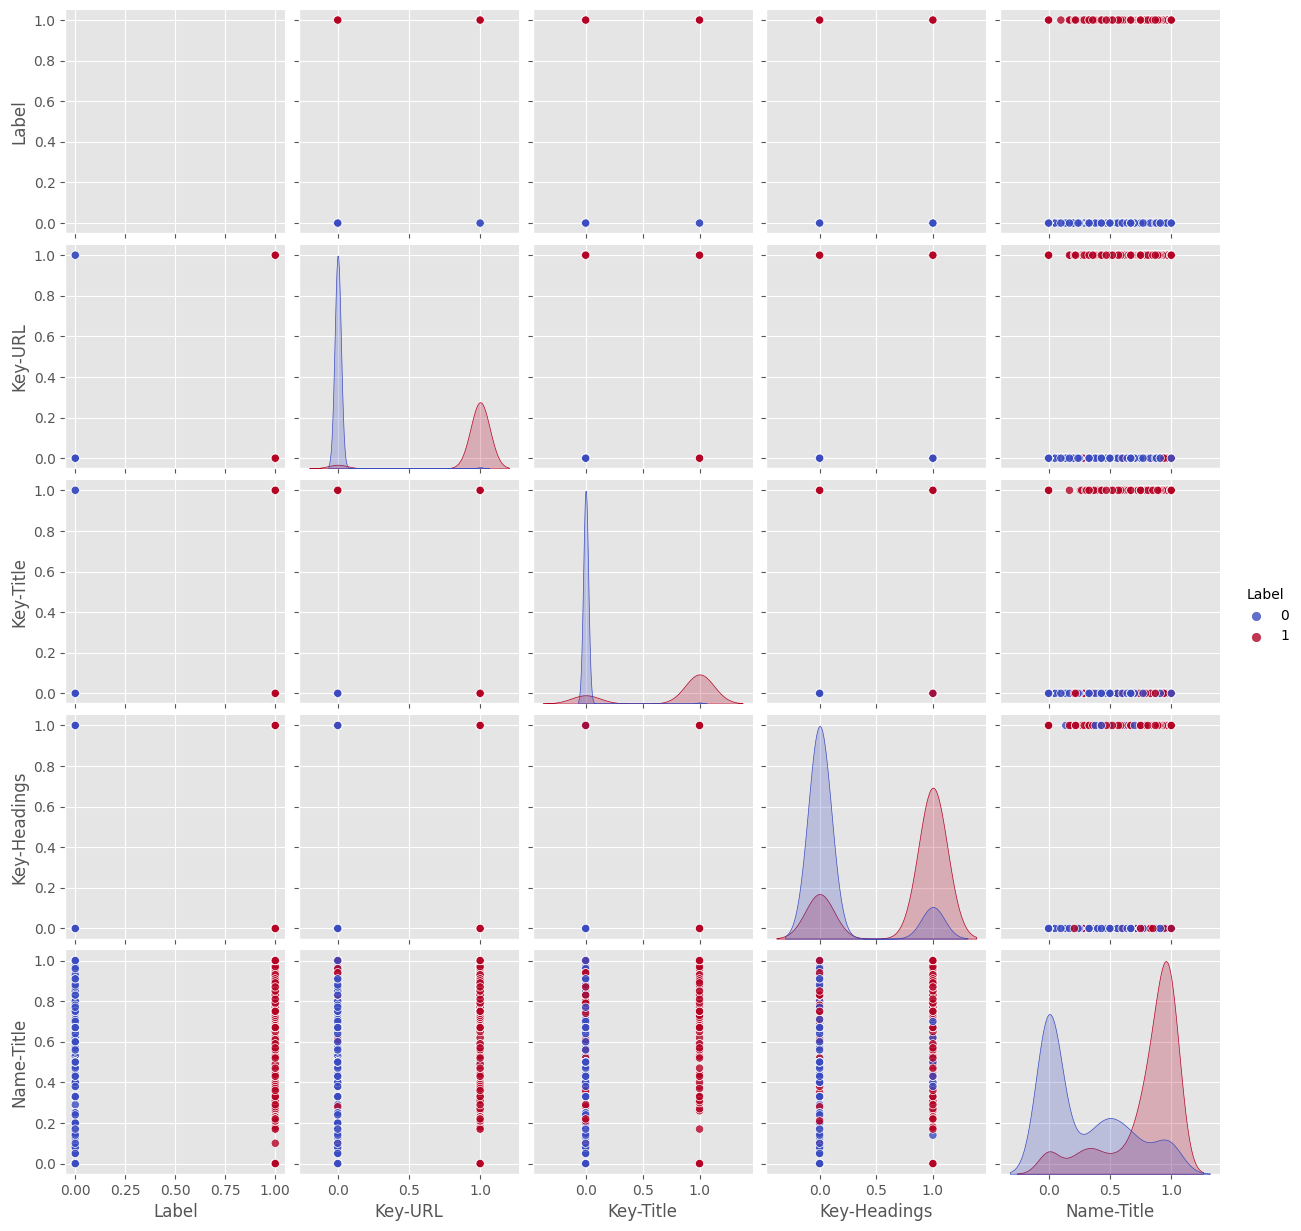

In [66]:
colors = generate_colors(2, colormap='coolwarm')
palette = {0: colors[0], 1:colors[1]}
sns.pairplot(data=df_train, vars=corr_features[:5], diag_kind='kde', hue='Label', palette=palette)

Pairplot for the 5 least correlated features

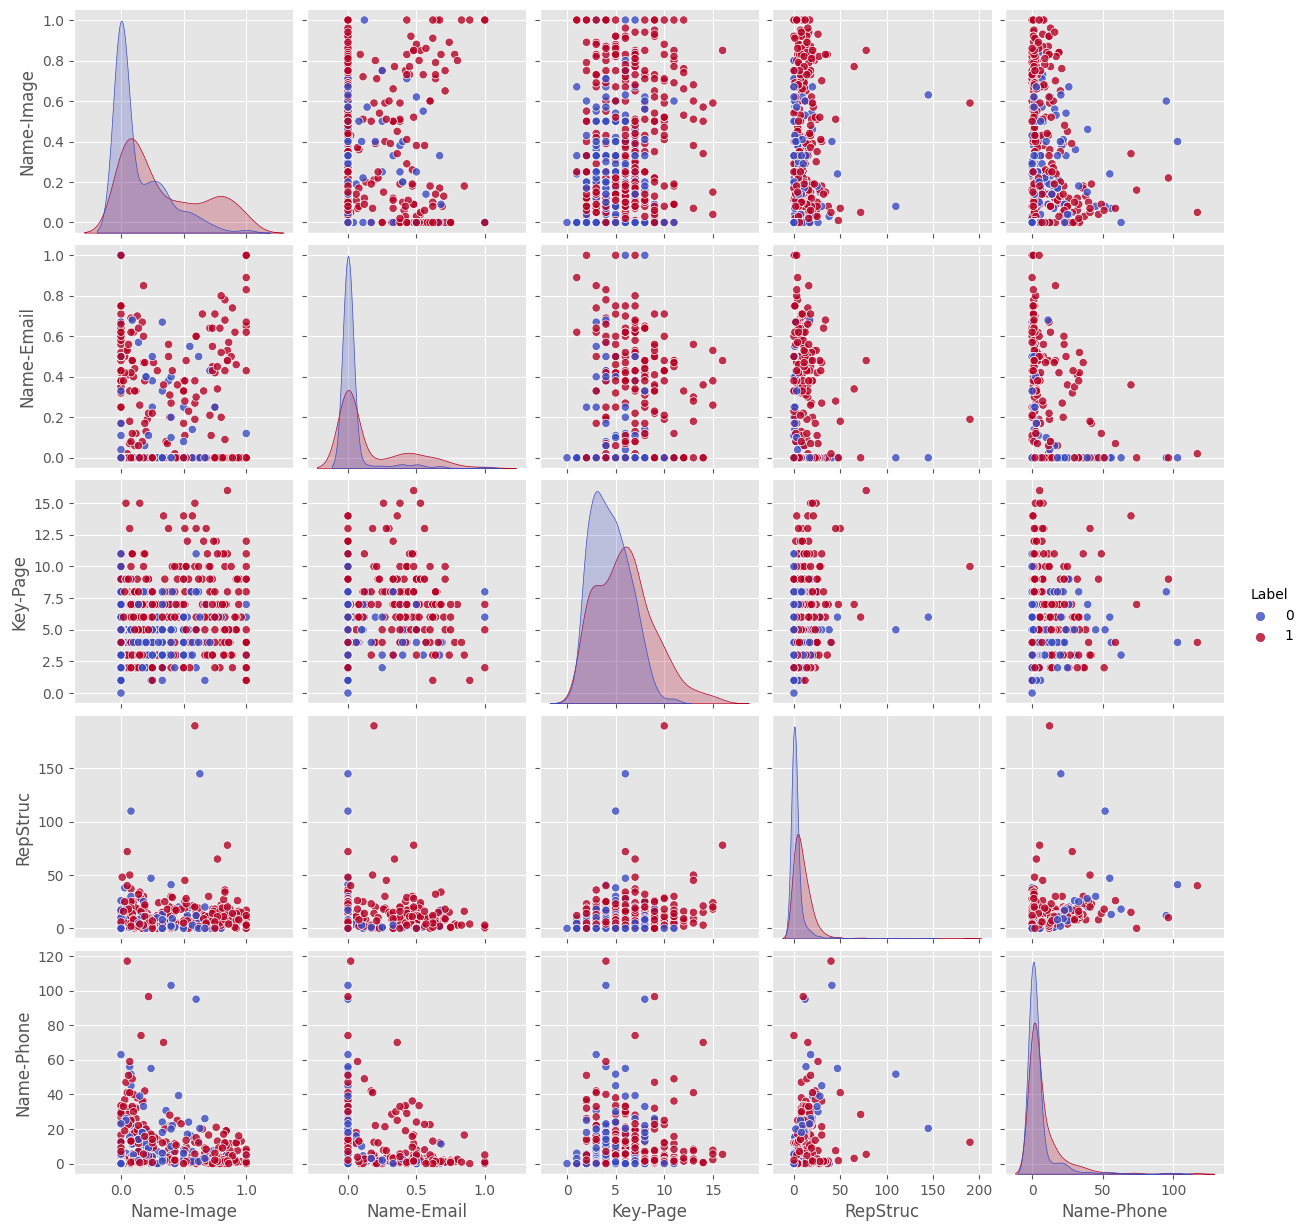

In [67]:
sns.pairplot(data=df_train, vars=corr_features[-5:], hue='Label', diag_kind='kde', palette=palette)

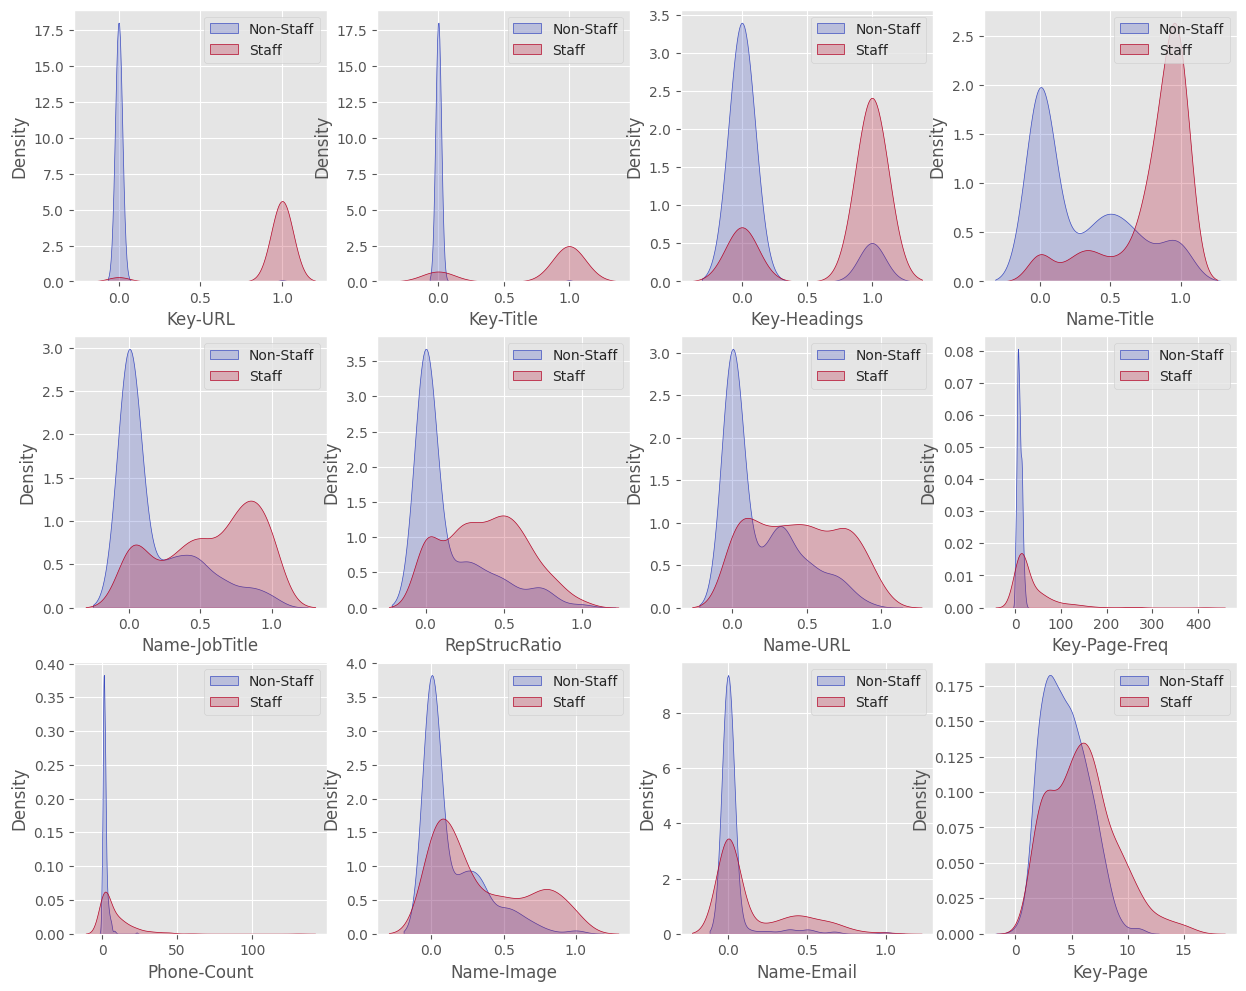

In [68]:
def plot_kde(ax, col):
    sns.kdeplot(df_train.loc[df_train['Label'] == 0, col], fill=True, label='Non-Staff', color=generate_colors(2, colormap='coolwarm')[0], ax=ax)
    # ax.scatter([], [], label="Non-Staff",   marker='o', s=60)
    sns.kdeplot(df_train.loc[df_train['Label'] == 1, col], fill=True, label='Staff', color=generate_colors(2, colormap='coolwarm')[-1], ax=ax)
    # ax.scatter([], [], label="Staff",   marker='o', s=60)
    legend = ax.legend(loc='best')
    legend.get_texts()[0].set_color("0.15")
    legend.get_texts()[1].set_color("0.15")


corr_features = get_corr(df_train)
corr_feature_names = corr_features.index[1:] # ignore the label
fig, axs = plt.subplots(3, 4, figsize=(15, 12))
# print(axs)
# print(axs[0])
# axs[0].plot(range(10), range(10))
idx1 = -1
for i, col in enumerate(corr_feature_names[:12]):
    idx2 = i % 4
    idx1 = idx1 + 1 if idx2 == 0 else idx1
    plot_kde(axs[idx1, idx2], col)

# plt.tight_layout()

<span style='line-height:1.5;'>From the KDE plot, we can see that most of the domain-intensive multi-source features are high-quality in terms of separarting the two categories</span>

<h1 id='method'>Classification with Multi-Source Domain-Intensive Features</h1>

In [69]:
# Recheck that the data is balanced
df.Label.value_counts()

0    552
1    552
Name: Label, dtype: int64

In [70]:
df.index

RangeIndex(start=0, stop=1104, step=1)

Split the data into training and test sets

In [71]:
# Already split the data above
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], 
#                                                     df.iloc[:, -1], 
#                                                     test_size=0.3, 
#                                                     stratify=df.iloc[:, -1], 
#                                                     shuffle=True, 
#                                                     random_state=random_state
#                                                     )

Check stratification

In [72]:
y_train.value_counts()

0    386
1    386
Name: Label, dtype: int64

In [73]:
y_test.value_counts()

0    166
1    166
Name: Label, dtype: int64

### Grid Search for Model Selection

In [74]:
steps = [
    ('scaler', MinMaxScaler()),
    ('clf', SVC()),
]
pipe = Pipeline(steps=steps)

In [75]:
# Parameters
param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'clf': [SVC(random_state=random_state), 
            GaussianNB(),
            KNeighborsClassifier(), 
            MLPClassifier(max_iter=1000, random_state=random_state), 
            DecisionTreeClassifier(random_state=random_state), 
            RandomForestClassifier(random_state=random_state),
            ],
}

In [76]:
# Use n_jobs = -1 if you want to use all cores
search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=4, n_jobs=4, verbose=1, return_train_score=True, refit=True, scoring=scoring)

In [77]:
_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


In [78]:
def display_search_result(gs, show_train=False, show_std=False, show_time=False, show_split=False):
    """Display the result of GridSearch nicely"""

    results = {}
    for k in gs.cv_results_.keys():
        if 'param' in k and 'params' not in k:
            results[k] = gs.cv_results_[k]
    for k in gs.cv_results_.keys():
        if k in results \
            or (not show_train and 'train' in k) \
            or (not show_std and 'std' in k) \
            or (not show_time and 'time' in k) \
            or (not show_split and 'split' in k)\
            or 'params' in k: 
            continue 
        results[k] = gs.cv_results_[k]
    
    return pd.DataFrame(results)

In [79]:
result = display_search_result(search)

In [80]:
result.sort_values(by='mean_test_score', ascending=False)

,param_clf,param_scaler,mean_test_score,rank_test_score
10,RandomForestClassifier(random_state=42),MinMaxScaler(),0.98,1
11,RandomForestClassifier(random_state=42),StandardScaler(),0.98,2
1,SVC(random_state=42),StandardScaler(),0.98,3
7,"MLPClassifier(max_iter=1000, random_state=42)",StandardScaler(),0.97,4
4,KNeighborsClassifier(),MinMaxScaler(),0.97,5
0,SVC(random_state=42),MinMaxScaler(),0.97,6
6,"MLPClassifier(max_iter=1000, random_state=42)",MinMaxScaler(),0.97,7
2,GaussianNB(),MinMaxScaler(),0.97,8
3,GaussianNB(),StandardScaler(),0.97,8
5,KNeighborsClassifier(),StandardScaler(),0.96,10


In [81]:
print(search.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', RandomForestClassifier(random_state=42))])


In [82]:
search.best_params_

{'clf': RandomForestClassifier(random_state=42), 'scaler': MinMaxScaler()}

In [83]:
search.best_score_

0.9779748218588616

<span>Note that random forests (RF) is the best model slightly outperforming SVC.</span>

### Feature Selection

<span style='line-height:1.5;'>The subset of selected features will be used with the best model from the above step of the <i>initial</i> model selection. Having an idea of what the best model is can prove useful for feature selection since some feature selection methods (ranking methods) can rank the feature based on a <i>specific model</i>. Some researchers prefer to swap steps and do feature selection first without performing an initial step of model selection. However, it makes more sense to have a few candidate of good models then perform feature selection since feature selection can be influenced by the choice of the model.</span>

In [84]:
def get_features_importance(importance_arr):
    features = pd.Series(df.iloc[:, 1:-1].columns)
    values = pd.Series(importance_arr)
    result = pd.concat([features, values], axis=1)
    result.columns = ['Feature', 'Importance'] 
    result = result.sort_values(by='Importance', ascending=False)
    result.index = range(len(result))
    return result

In [85]:
steps = [
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=random_state)),
]
pipe = Pipeline(steps=steps)

In [86]:
_ = pipe.fit(X_train, y_train)

Rank the feature based on their importance to RF

In [87]:
rf_features = get_features_importance(pipe['clf'].feature_importances_)
rf_features

,Feature,Importance
0,Key-URL,0.34
1,Key-Title,0.21
2,Key-Headings,0.07
3,RepStruc,0.06
4,Name-Title,0.06
5,Key-Page-Freq,0.05
6,Name-JobTitle,0.04
7,RepStrucRatio,0.04
8,Phone-Count,0.03
9,Name-URL,0.02


In [88]:
def get_feature_names_from_support(support, df=df):
    selected_features = list(df.iloc[:, 1:-1].loc[:, support].columns)
    print("Number of selected features = ", len(selected_features))
    return selected_features

In [89]:
kbest = SelectKBest(f_classif, k=5)
_ = kbest.fit(X_train, y_train)

In [90]:
f_features = get_feature_names_from_support(kbest.get_support())
f_features.sort()
f_features

Number of selected features =  5


['Key-Headings', 'Key-Title', 'Key-URL', 'Name-JobTitle', 'Name-Title']

In [91]:
corr_features = get_corr_features(df.iloc[:, 1:], threshold=0, pairwise_threshold=1.0)[:5]
corr_features.sort()
corr_features

Number of features that have corr coeff above 0 is 14
Number of features after filtering:  14


['Key-Headings', 'Key-Title', 'Key-URL', 'Name-JobTitle', 'Name-Title']

Interestingly, the top 5 features based on anova happens to be the features with the highest correlation with the target variable.

In [92]:
# Try chi2 this time
kbest = SelectKBest(chi2, k=5)
_ = kbest.fit(X_train, y_train)

In [93]:
chi2_features = get_feature_names_from_support(kbest.get_support())
chi2_features.sort()
chi2_features

Number of selected features =  5


['Key-Page-Freq', 'Key-URL', 'Name-Phone', 'Phone-Count', 'RepStruc']

Interestingly, the top 5 features based on Chisquare are different from the top 5 features based on anove and they are not the features with highest correlation 

Try different feature selection methods with RF (best model) based on the initial model selection step

In [94]:
steps = [
    ('scaler', StandardScaler()),
    ('select', 'passthrough'),
    ('clf', RandomForestClassifier())
]

param_grid= {
    'select': [
        'passthrough',
        SelectKBest(f_classif, k=10),
        SelectFromModel(RandomForestClassifier(random_state=random_state), threshold='mean'),
        RFE(RandomForestClassifier(random_state=random_state), n_features_to_select=10, step=1),
    ]
}

pipe = Pipeline(steps=steps)

In [95]:
search = GridSearchCV(pipe, param_grid=param_grid, cv=4, n_jobs=4, verbose=1, return_train_score=True, refit=True, scoring=scoring)

In [96]:
_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [97]:
print(search.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('clf', RandomForestClassifier())])


In [98]:
display_search_result(search)

,param_select,mean_test_score,rank_test_score
0,passthrough,0.98,3
1,SelectKBest(),0.98,2
2,SelectFromModel(estimator=RandomForestClassifi...,0.97,4
3,RFE(estimator=RandomForestClassifier(random_st...,0.98,1


<span style='line-height:1.5;'><strong>Note:</strong> We can see that feature selection did not help much since _passthrough_ performs almost equally with the feature selection methods. This can be justified by the fact that feature selection is most useful when there are a lot of noisy and highly correlated features. If the number of features is not very large and the features are of high-quality (as is the case in this study), feature selection will not have a significant impact on the model performance.</span>

## Hyperparameter Tuning

The random forest classifier performs better than other models. Performs hyperparameter tuning.

In [99]:
# Fix scaler and feature selection (passthrough) from the previous findings
steps = [
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier()),
]

param_grid = {
    'clf__criterion': ['log_loss', 'gini', 'entropy'],
    'clf__n_estimators': [50, 100, 200],
    'clf__bootstrap': [True, False],
    'clf__min_samples_split': [2, 4, 8],
    'clf__max_features': ['sqrt', 'log2', None], # None: use all features
    'clf__random_state': [random_state],
}

pipe = Pipeline(steps=steps)

In [100]:
search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=4, refit=True, n_jobs=4, return_train_score=True, scoring=scoring, verbose=1)

In [101]:
_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


In [102]:
print(search.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, criterion='log_loss',
                                        random_state=42))])


In [103]:
search.best_params_

{'clf__bootstrap': False,
 'clf__criterion': 'log_loss',
 'clf__max_features': 'sqrt',
 'clf__min_samples_split': 2,
 'clf__n_estimators': 100,
 'clf__random_state': 42}

**Now, evaulate the model performance on the hidden test data**

In [104]:
# NOTE No need to re-train the model on the entire training data because we used refit=True in GridSearchCV
y_pred = search.best_estimator_.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.9759036144578314

In [106]:
recall_score(y_test, y_pred)

0.9698795180722891

In [107]:
precision_score(y_test, y_pred)

0.9817073170731707

In [108]:
print(classification_report(y_test, y_pred, target_names=["Not Staff", "Staff"]))

              precision    recall  f1-score   support

   Not Staff       0.97      0.98      0.98       166
       Staff       0.98      0.97      0.98       166

    accuracy                           0.98       332
   macro avg       0.98      0.98      0.98       332
weighted avg       0.98      0.98      0.98       332



In [109]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.98192771, 0.01807229],
       [0.03012048, 0.96987952]])

Performance on the training data

In [110]:
y_train_pred = search.best_estimator_.predict(X_train)

In [111]:
print(accuracy_score(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

1.0
1.0
1.0


In [112]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       386

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



In [113]:
# To avoid running the grid search again, fix the hyperparameter in the pipeline below
steps = [
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, 
                                   criterion='log_loss',
                                   max_features = 'sqrt',
                                   min_samples_split = 2, 
                                   bootstrap=False, 
                                   random_state=random_state)),
]

rf_est = Pipeline(steps=steps)

In [114]:
_ = rf_est.fit(X_train, y_train)

In [115]:
y_pred = rf_est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       166
           1       0.98      0.97      0.98       166

    accuracy                           0.98       332
   macro avg       0.98      0.98      0.98       332
weighted avg       0.98      0.98      0.98       332



In [116]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.98192771, 0.01807229],
       [0.03012048, 0.96987952]])

**<span style='color:red;'>The classifier is stochastic, so evaluate it using 21 runs to establish statistical significance of the results.</span>**

In [117]:
scores = evaluate_estimator(rf_est, X_train, X_test, y_train, y_test)

Stochastic Estimator
Running in parallel


In [118]:
print_classification_report(scores)

Class               Precision           Recall              F1                  
0                   0.98                0.97                0.97                
1                   0.97                0.98                0.97                

Average accuracy    0.97
Average precision   0.98
Average recall      0.98
Average f1 score    0.97


Measure the cross-validation time on the entire dataset

In [119]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))
print(X.shape)
print(y.shape)

(1104, 14)
(1104,)


In [120]:
rf_est_cv_times = measure_cv_time(rf_est, X, y)

20% - 30% - 40% - 50% - 60% - 70% - 80% - 90% - 100% - 


In [121]:
rf_est_cv_times

[0.36003761291503905,
 0.48818001747131345,
 0.6434724807739258,
 0.8220139026641846,
 0.9612954139709473,
 1.128581428527832,
 1.3052850723266602,
 1.4548635959625245,
 1.615425443649292]

In [122]:
# get_features_importance(rf_est['clf'].feature_importances_)

<h1 id='cuwtc'>Classification Using Web Textual Content</h1>

In [123]:
# The HTML files of the websites are stored in a postgresql database
conn = psycopg2.connect(database="InstituteDB", user="postgres", password="", host="localhost", port="5432")

In [124]:
sql_table = pd.read_sql('SELECT url, html FROM url_html', conn)
text_df = pd.DataFrame(sql_table)
conn.close()
del sql_table

/tmp/ipykernel_21566/2522063687.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_table = pd.read_sql('SELECT url, html FROM url_html', conn)


In [125]:
text_df.head()

,url,html
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."


Remove webpages that we are unable to fetch

In [126]:
error_df = text_df[~text_df.html.str.contains("<html")]
error_df.index = range(len(error_df))
error_df.head()

,url,html
0,http://www.sun.ac.za/english/faculty/economy/M...,ConnectionError
1,http://www.africanfeminisms.uct.ac.za/agi/home,ConnectionError
2,http://www.sun.ac.za/english/faculty/milscienc...,ConnectionError
3,http://www.sun.ac.za/english/faculty/milscienc...,ConnectionError
4,https://www.up.ac.za/faculty-of-economic-and-m...,ConnectionError


In [127]:
text_df.shape

(2293, 2)

In [128]:
error_df.shape

(495, 2)

In [129]:
# refine data set by droping errors
text_df = text_df[~text_df.url.isin(error_df.url)]
text_df.shape

(1787, 2)

In [130]:
# check there is no errors
text_df.html.str.contains("<html").all()

True

In [131]:
text_df.columns = ['Link', 'HTML']
text_df.head()

,Link,HTML
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."


In [132]:
# text_df = pd.read_csv("academic_websites_text_partial.csv", encoding='utf-8')

In [133]:
text_df.shape

(1787, 2)

Create Label

In [134]:
text_df.drop_duplicates(subset=['Link'], keep='last', ignore_index=False, inplace=True)
text_df.shape

(1780, 2)

In [135]:
text_df.set_index('Link', verify_integrity=True, inplace=True)
text_df.head()

,HTML
Link,
https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
http://www.sun.ac.za/english/faculty/agri/agricultural-economics/staff-and-students,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
http://www.sun.ac.za/english/faculty/Pages/default.aspx,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
http://www.sun.ac.za/english/faculty/agri/agronomy/staff/academic-staff,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."
http://www.sun.ac.za/english/faculty/agri/animal-science/contact-us,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di..."


In [136]:
text_df.shape

(1780, 1)

Recall we have already read the original dataset of link-category pairs

In [137]:
label_df.shape

(2031, 1)

In [138]:
label_df.head()

,Category
URL,
https://www.sun.ac.za/english,0
http://www.sun.ac.za/english/faculty/agri/agricultural-economics/staff-and-students,1
http://www.sun.ac.za/english/faculty/Pages/default.aspx,0
http://www.sun.ac.za/english/faculty/agri/agronomy/staff/academic-staff,1
http://www.sun.ac.za/english/faculty/agri/animal-science/contact-us,0


In [139]:
# Check if the indexes are the same in order to use pd.concat to create the label column
all([idx in label_df.index for idx in text_df.index])
# (text_df.index == label_df.index).all()

True

In [140]:
# Check if the indexes are the same 
text_df.index.isin(label_df.index).all()

True

In [141]:
text_df = pd.concat([text_df, label_df], axis=1, ignore_index=False, join='inner')
text_df.head()

,HTML,Category
https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
http://www.sun.ac.za/english/faculty/agri/agricultural-economics/staff-and-students,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
http://www.sun.ac.za/english/faculty/Pages/default.aspx,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
http://www.sun.ac.za/english/faculty/agri/agronomy/staff/academic-staff,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
http://www.sun.ac.za/english/faculty/agri/animal-science/contact-us,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0


In [142]:
text_df.shape

(1780, 2)

In [143]:
text_df.reset_index(names='Link', inplace=True)
text_df.head()

,Link,HTML,Category
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0


In [144]:
text_df.rename(columns={'Category': 'Label'}, inplace=True)
text_df.head()

,Link,HTML,Label
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0


### Removing Unwanted Records

Removing Individual staff pages

In [145]:
text_df = text_df[text_df['Label'] != 2]
text_df.shape

(1269, 3)

In [146]:
text_df = text_df[text_df.HTML.str.contains("<html")]
text_df.shape

(1269, 3)

Align text data with heuristic data

In [147]:
# Heuristics dataset
df.shape

(1104, 16)

In [148]:
text_df.shape

(1269, 3)

In [149]:
text_df = text_df[text_df.Link.isin(df.Link)]
assert text_df.shape[0] == df.shape[0], "Not aligned"

In [150]:
text_df.shape

(1104, 3)

Get the text from HTML

In [151]:
def get_text(row):
    """Get the text from HTML in the dataframe."""

    text = row['HTML']
    soup = BeautifulSoup(text, 'lxml')

    def get_web_text(soup, tag=None):
        """Return the text in the whole page. If tag is not None, returns the text under the tag
        including the text in all its descendants."""

        txt = []
        if tag is None:
            string_gen = soup.stripped_strings
        else:
            string_gen = tag.stripped_strings

        # Can use the simple soup.get_text(). But stripped string generator is useful for stripped 
        # extra whitespaces as html text tends to have many of those
        for string in string_gen:
            txt.append(string)
        return " ".join(txt)
    
    return get_web_text(soup)

In [152]:
# For every row that contains the HTML, get the text from the webpage for text classification
text_df['Text'] = text_df.apply(get_text, axis=1)

In [153]:
text_df.head()

,Link,HTML,Label,Text
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Stellenbosch University Home Faculties My.Sun ...
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1,Staff Faculties My.Sun A - Z Dates Careers @ S...
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Faculties Faculties My.Sun A - Z Dates Careers...
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1,Academic Staff Faculties My.Sun A - Z Dates Ca...
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Contact Us Faculties My.Sun A - Z Dates Career...


In [154]:
text_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1761, 1763, 1765, 1767, 1769, 1771, 1773, 1775, 1777, 1779],
           dtype='int64', length=1104)

In [155]:
# Reindexing
text_df.index = range(len(text_df))
text_df.index

RangeIndex(start=0, stop=1104, step=1)

### Text Preprocessing

Text preprocessor transformer

In [156]:
# from sklearn.base import TransformerMixin, BaseEstimator
# import multiprocessing as mp
# import copy 

# class TextPreprocessor(BaseEstimator, TransformerMixin):
#     """
    
#     NOTE: I did not use in the Jupyter Notebook. For some reason, multiprocessing
#     does not work as expected. However, in a script, everything should work fine."""

#     def __init__(self, n_jobs=-1):
#         self.n_jobs = n_jobs


#     def fit(self, X, y=None):
#         return self 
    

#     def fit_transform(self, X, y=None):
#         X_copy = copy.copy(X)
#         if not isinstance(X_copy, np.ndarray):
#             X_copy = np.array(X_copy) 
        
#         ncores = self._get_njobs() 
#         job_queue = np.array_split(X_copy, ncores)
#         with mp.Pool(processes=ncores) as pool:
#             results = pool.map(self._handle_job, job_queue)
        
#         return results
        

#     def _get_njobs(self):
#         ncores = mp.cpu_count()
#         if self.n_jobs <= 0:
#             return ncores
#         elif self.n_jobs < ncores:
#             return self.n_jobs
#         else:
#             ncores 
 

#     def _handle_job(self, job):
#         print(job.shape)
#         text = job[0]
#         return [self._clean_text(text)]


#     def _clean_text(self, text):
#         # The order by which these operations are performed MATTERS
#         # text = text['Text']
#         text = self._remove_emails(text)
#         text = self._remove_urls(text)
#         text = self._remove_phone_numbers(text)
#         text = self._remove_numbers(text)
#         text = self._remove_punctuation(text)
#         text = self._remove_2grams(text)
#         text = self._lemmatize(text)
#         return text 
#         # text = self._remove_stop_words(text)


#     def _remove_punctuation(self, text, exception_list=[]):
#         """Remove punctuation from the text. If `exception_list` is given punctuation
#         in the list will not be removed.

#         Ideally, '@' should not be removed to identify emails, '+' can be found in
#         phones, '.' and '?' can give the NER context which can help in name identification"""
#         punctuation = ""
#         for ch in string.punctuation:
#             if ch not in exception_list:
#                 punctuation += ch
#         return text.translate(str.maketrans(punctuation, " " * len(punctuation)))

#     def _remove_stop_words(self, text):
#         doc = nlp(text)
#         text = [word.text for word in doc if not word.is_stop]
#         return ' '.join(text)

    
#     def _remove_numbers(self, text):
#         text = re.sub(r"[^a-zA-Z\.]", " ", text)
#         return ' '.join(text.split())


#     def _remove_emails(self, text):
#         """Remove emails from the text.

#         NOTE: this is done since NER appears to identify emails as people. This
#         cleaning must only be used for NER and the emails should be retained in the
#         original page text since they are used with some heuristics."""
#         pattern = re.compile(
#             r"[a-zA-Z0-9_.+-]+\s?@\s?[a-zA-Z0-9-]+\s?\.\s?[a-zA-Z0-9-.]+"
#         )
#         text = re.sub(
#             # NOTE the regex contains optional spaces since emails in the webpages
#             # can sometimes be separated by spans (bad thing to do)
#             pattern,
#             "",
#             text,
#         )
#         return ' '.join(text.split())


#     def _remove_phone_numbers(self, text):
#         # Remove SA cellphone numbers
#         # TODO need some adjustment. Not working properly in some cases.
#         pattern = re.compile(
#             r"(?:(?:\+27\s?)|(?:0)|(?:\(\s?\+27\s?\)))[-\s]?\d{2,3}[-\s]?\d{3}[-\s]?\d{4}|(?:\+27\s?\(0\)\s?\d{2}\s?\d{3}\s?\d{4})"
#         )
#         text = re.sub(pattern, "", text)
#         return ' '.join(text.split())
    

#     def _remove_urls(self, text):
#         pattern = re.compile(
#             r"((http|ftp|https):\/\/)?([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
#         )
#         text = re.sub(pattern, " ", text)
#         return  ' '.join(text.split())
    

#     def _remove_2grams(self, text):
#         text = [word for word in text.split() if len(word) > 2 or word.lower() in ['dr', 'mr', 'ms']]
#         return ' '.join(text)

#     def _lemmatize(self, text):
#         doc = nlp(text)
#         # Need to consider captialize?
#         lem = [word.lemma_.lower() for word in doc if not word.is_stop]
#         return ' '.join(lem)

In [157]:
from unidecode import unidecode


# Define nested functions as they are not useful outside this function
def substitute_emails(text):
    """Remove emails from the text and substitute it with the word 'Email'. This makes the text more 
    informative for the models.  We expect staff-landing pages to have many of those."""

    pattern = re.compile(
        r"[a-zA-Z0-9_.+-]+\s?@\s?[a-zA-Z0-9-]+\s?\.\s?[a-zA-Z0-9-.]+"
    )
    text = re.sub(
        pattern,
        " Email ", 
        text,
    )
    return ' '.join(text.split())

def remove_urls(text):
    pattern = re.compile(
        r"((http|ftp|https):\/\/)?([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    )
    text = re.sub(pattern, " ", text)
    return  ' '.join(text.split())
    

def substitute_phones(text):
    """Remove emails from the text and substitute it with the word 'Telephone'. This makes the text more 
    informative for the models.  We expect staff-landing pages to have many of those."""

    # Remove SA cellphone numbers
    pattern = re.compile(
        r"(?:(?:\+?27\s?)|(?:0)|(?:\(\s?\+27\s?\)))[-\s]?\d{2,3}[-\s]?\d{3}[-\s]?\d{4}|(?:\+?27\s?\(0\)[-\s]?\d{2}[-\s]?\d{3}[-\s]?\d{4})|(?:\(0\d{2}\)[-\s]?\d{3}[-\s]?\d{4})"
    )
    text = re.sub(pattern, " Telephone ", text)
    return ' '.join(text.split())


def remove_numbers(text):
    """Remove numbers from the page. In the academic website classification, numbers are mostly 
    meaningless. This step might not hold generally for other classification tasks.
    
    NOTE: this method should be called after handling cellphone numbers."""
    
    text = re.sub(r"[^a-zA-Z\.]", " ", text)
    return ' '.join(text.split())

def standardize(text):
    """This function performs the following tasks using SpaCy:
        - Remove accent
        - Remove punctuation.
        - Remove stopwords
        - Remove extra spaces
        - Remove words of length 2 (this can unfortunately results form parsing HTML) except titles (dr, mr, ms)
        - Lemmatize
        - Convert words to lower case
        
        These steps are grouped to apply SpaCy text pipeline only once since it
        is the most time-consuming step
    """

    text = unidecode(text)
    doc = nlp(text)
    words = [token.lemma_.lower() for token in doc if not token.is_punct 
                and not token.is_stop 
                and not token.is_space 
                # Remove words of length 2 (this can appear in the url if it is in the page text)
                and (len(token) > 2 or token.lemma_.lower() in ['dr', 'mr', 'ms'])
            ]
    return ' '.join(words)

def clean_text(text):
    """The row in the dataframe should have a label of 'Text'"""
    text = substitute_emails(text)
    text = remove_urls(text) 
    text = substitute_phones(text)
    # Remove numbers only after substituting phones
    text = remove_numbers(text)
    return standardize(text)

<span>Crudily testing the text preprocessing functions without a proper unit test!</span>

In [158]:
text = "Remove 12 any 65 222 8888 number 0 form 784 the 98734 page"
remove_numbers(text)

'Remove any number form the page'

In [159]:
text = "Remove https://domain.org/ any http://domain.ac.za/ url https://domain.org/path/to/page from www.domain.org the domain.ac.za page domain.ac.za/path"
remove_urls(text)

'Remove any url from the page'

In [160]:
text = """Replacing john.doe@domain.com any jd@su.a.c.za from john-doe@domain.com the john.doe@uct.ac.za page johndoe123@gmail.com
even john.doe @ domain . com including john.doe @ su.ac.za spaces"""
substitute_emails(text)

'Replacing Email any Email from Email the Email page Email even Email including Email spaces'

In [161]:
text = """
+27 12 345 6789
+27-12-345-6789
+27123456789
+27 123456789
(+27) 12 345 6789
(+27) 12-345-6789
(+27)123456789
(+27)123456789
012 345 6789
(012) 345 6789
0123456789
012-345-6789
(012) 345-6789
+27 12 529 2401
+27 (0) 11 559 2982
+27(0)11 559 3244
0115592982
27 41 504 3810
0415043796
+27 41 504 4301
27 41 5042084
27 41 504-4235
+27 (0)41 5042507
041 5041468
+27 041 5042329
041-5832317
046 6038742
046-603 8739
+27 (0)21 959 2011
"""
# +27 (0) 11 559 4454 / 2859 This will be dealt with
text = substitute_phones(text)
text.replace("Telephone", "Tel")

'Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel Tel'

In [162]:
# Run text cleaning in parallel
# See the note above on using multiprocessing without `if __name__ == '__main__'`
njobs = 4 #mp.cpu_count()

with mp.Pool(njobs) as pool:
    cleaned_text = pool.map(clean_text, text_df['Text'])

assert len(cleaned_text) == len(text_df)

In [163]:
text_df['Cleaned_Text'] = cleaned_text
text_df.head()

,Link,HTML,Label,Text,Cleaned_Text
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Stellenbosch University Home Faculties My.Sun ...,stellenbosch university home faculties dates c...
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1,Staff Faculties My.Sun A - Z Dates Careers @ S...,staff faculties dates careers contact welcome ...
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Faculties Faculties My.Sun A - Z Dates Careers...,faculty faculties dates careers contact welcom...
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",1,Academic Staff Faculties My.Sun A - Z Dates Ca...,academic staff faculties dates careers contact...
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",0,Contact Us Faculties My.Sun A - Z Dates Career...,contact faculties dates careers contact welcom...


In [164]:
# Reorder columns. I like to see the label column at the end
columns = list(text_df.columns)
columns.remove('Label')
columns.append('Label')
text_df = text_df[columns]
text_df.head()

,Link,HTML,Text,Cleaned_Text,Label
0,https://www.sun.ac.za/english,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",Stellenbosch University Home Faculties My.Sun ...,stellenbosch university home faculties dates c...,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",Staff Faculties My.Sun A - Z Dates Careers @ S...,staff faculties dates careers contact welcome ...,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",Faculties Faculties My.Sun A - Z Dates Careers...,faculty faculties dates careers contact welcom...,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",Academic Staff Faculties My.Sun A - Z Dates Ca...,academic staff faculties dates careers contact...,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,"\r\n\r\n<!DOCTYPE html >\r\n<html lang=""en"" di...",Contact Us Faculties My.Sun A - Z Dates Career...,contact faculties dates careers contact welcom...,0


In [165]:
text_df.shape

(1104, 5)

### Saving and reloading the cleaned data

This to avoid redoing the clearning steps over again

In [166]:
# Drop HTML and raw text
text_df.drop('HTML', axis=1, inplace=True)
text_df.drop('Text', axis=1, inplace=True)
text_df.head()

,Link,Cleaned_Text,Label
0,https://www.sun.ac.za/english,stellenbosch university home faculties dates c...,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,staff faculties dates careers contact welcome ...,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,faculty faculties dates careers contact welcom...,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,academic staff faculties dates careers contact...,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,contact faculties dates careers contact welcom...,0


In [167]:
text_df.shape

(1104, 3)

## To Save Time Load the data from Below

In [168]:
# Write the data to save some times next time
cwd = os.getcwd()
outfile = 'academic_websites_cleaned_text.csv'
filename = os.path.join(cwd, outfile)
# text_df.to_csv(filename, index=False, mode='w')

In [169]:
text_df = pd.read_csv(filename)
text_df.head()

,Link,Cleaned_Text,Label
0,https://www.sun.ac.za/english,stellenbosch university home faculties dates c...,0
1,http://www.sun.ac.za/english/faculty/agri/agri...,staff faculties dates careers contact welcome ...,1
2,http://www.sun.ac.za/english/faculty/Pages/def...,faculty faculties dates careers contact welcom...,0
3,http://www.sun.ac.za/english/faculty/agri/agro...,academic staff faculties dates careers contact...,1
4,http://www.sun.ac.za/english/faculty/agri/anim...,contact faculties dates careers contact welcom...,0


In [170]:
text_df.shape

(1104, 3)

In [171]:
text_df.Label.value_counts()

0    552
1    552
Name: Label, dtype: int64

### Word Correlation

In [172]:
# def get_topn_features_using_stat_test(features, feature_names, df, target_col='Label', test='chi2', topn=10, ngrams=2, category_label=None):
#     if test == 'chi2':
#         test = chi2 
#     elif test == 'anova':
#         test = f_classif
#     else:
#         raise ValueError("Unknown statistical test")
    
#     # Create category-label mapping if not provided
#     labels = df[target_col].unique()
#     if not category_label:
#         category_label = zip(labels, labels)
    
#     results = []
#     columns = []
#     # Print the most correlated for each label
#     for category, label in category_label:
#         # print(f"Category: {category}\tLabel: {label}")
#         # Make the target vector
#         target_vec = (df[target_col] == label).astype('int')

#         # Run the stat test
#         test_results = test(features, target_vec)
#         test_stat = test_results[1]

#         # Sort the test stat and reverse the order
#         indexes = np.argsort(test_stat)[:]

#         # Get the feature names
#         feature_names_out = np.array(feature_names)[indexes]

#         # Get the most correlated grams
#         for ngram in range(1, ngrams + 1):
#             columns.append((f"Label = {category}", f"{ngram}-grams"))
#             grams = [feature for feature in feature_names_out if len(feature.split()) == ngram][:topn]
#             results.append(grams)
#             # print(f"The top {topn} correlated grams of {ngram} words:")
#             # for feature in grams:
#             #     print(feature)
#             # print()
#         # print("-"*50)
#         # print()
#     results = list(zip(*results))
#     df = pd.DataFrame(results)
#     df.columns = pd.MultiIndex.from_tuples(columns)
#     dfstyle = df.style.set_properties(**{'text-align': 'left'})
#     dfstyle.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
#     return df

In [173]:
tfidf = TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1,2), lowercase=False,\
                         max_features=None, use_idf=True, smooth_idf=True, sublinear_tf=True)

features = tfidf.fit_transform(text_df['Cleaned_Text'])
feature_names = tfidf.get_feature_names_out()
labels = text_df.Label.unique()
labels = ['Not Staff', 'Staff']
category_label = list(zip(list(labels), list(labels)))
category_label


def topn_features(test='anova', topn=10, ngrams=2):
    """Returns the top `topn` words that are more informative of the target labels"""
    if test == 'chi2':
        _, pvalues = chi2(features, text_df['Label'])
    else:
        _, pvalues = f_classif(features, text_df['Label'])
    # If chi2 statistics are used, need to reverse after sorting. If pvalues are used, no need for reversing
    indexes = np.argsort(pvalues)
    feature_names = np.array(tfidf.get_feature_names_out())[indexes]
    results = {}
    suffix = '-gram'
    for n in range(1, ngrams + 1):
        key = str(n) + suffix 
        results[key] = [feature for feature in feature_names if len(feature.split()) == n][:topn]

    results = pd.DataFrame(results)
    results.index = range(1, len(results)+1)
    return results

In [174]:
topn_features(topn=20)

,1-gram,2-gram
1,dr,senior lecturer
2,senior,associate professor
3,lecturer,head department
4,professor,staff home
5,ms,staff head
6,mr,position lecturer
7,associate,position senior
8,prof,search staff
9,mrs,position associate
10,head,academic staff


In [175]:
topn_features(test='chi2', topn=20)

,1-gram,2-gram
1,lecturer,senior lecturer
2,dr,associate professor
3,senior,lecturer email
4,professor,position lecturer
5,mr,view profile
6,associate,position senior
7,position,campus phone
8,ms,position associate
9,prof,email qualifications
10,mrs,phone telephone


In [176]:
top_anova = topn_features(test='anova', topn=50)
top_chi2 = topn_features(test='chi2', topn=50)

In [177]:
# Words in the top 100 by ANOVA but missed out by Chi2
set(top_anova['1-gram']).difference(top_chi2['1-gram'])

{'activity',
 'administrative',
 'africa',
 'campus',
 'degree',
 'der',
 'email',
 'field',
 'programme',
 'read',
 'student',
 'training',
 'wide',
 'world'}

In [178]:
# Words in the top 100 by Chi2 but missed out by ANOVA
set(top_chi2['1-gram']).difference(top_anova['1-gram'])

{'auckland',
 'biography',
 'cum',
 'emeritus',
 'interests',
 'kingsway',
 'laude',
 'naidoo',
 'patient',
 'profile',
 'responsibilities',
 'ring',
 'room',
 'technician'}

Count Vectorizer

In [179]:
count_vec = CountVectorizer(ngram_range=(1,1), min_df=5, max_df=0.9)

In [180]:
# CountVectorizer?

In [181]:
count_matrix = count_vec.fit_transform(text_df['Cleaned_Text'])

In [182]:
count_matrix.shape

(1104, 5693)

TFIDF

In [183]:
tfidf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, sublinear_tf=False)
# TfidfTransformer(smooth_idf=False, use_idf=True, sublinear_tf=False)

In [184]:
tfidf_matrix = tfidf_vec.fit_transform(text_df['Cleaned_Text'])

In [185]:
tfidf_matrix.shape

(1104, 34536)

In [186]:
def sort_coord(coo):
    tuples = zip(coo.col, coo.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


def get_top_vectorizer_features(matrix, feature_names, topn=10):
    coord = matrix.tocoo()
    col_data = zip(coord.col, coord.data) 
    sorted_col_data = sorted(col_data, key=lambda x: x[1], reverse=True)
    features = []
    scores = []
    idx = 0
    while len(features) < topn:

        col, score = sorted_col_data[idx]
        if feature_names[col] in features:
            idx += 1
            continue
        
        features.append(feature_names[col])
        scores.append(round(score, 2))
        idx += 1
    return pd.DataFrame(list(zip(features, scores)), columns=['Feature (Word)', 'Score'])

In [187]:
get_top_vectorizer_features(count_matrix, count_vec.get_feature_names_out(), topn=20)

,Feature (Word),Score
0,engineering,679
1,university,348
2,civil,315
3,structural,266
4,law,255
5,email,248
6,stellenbosch,231
7,fire,230
8,south,222
9,history,212


In [188]:
get_top_vectorizer_features(tfidf_matrix, tfidf_vec.get_feature_names_out(), topn=20)

,Feature (Word),Score
0,menu,1.00
1,inf,0.91
2,aims,0.88
3,music,0.84
4,fam,0.82
5,bible,0.82
6,productions,0.81
7,controversies,0.81
8,psychology,0.81
9,laser,0.81


<p style='line-height:1.5; padding: 20px; text-align: justify;'>Note that terms with the highest weights according the to the vectorizers above are the terms that does not occur in staff-landing webpages. General terms which are common at the university websites and are indicative for the negative category. TFIDF has a better weighting schemes (not only relying on the frequency), hence some specialized terms appear such as 'bible', 'laser', 'soil', etc.</p>

### Word Cloud

In [189]:
def generate_word_cloud(text, max_words=50):
    plt.figure(figsize=(8, 8))
    # plt.subplot(*subplots, idx)
    word_cloud = WordCloud(background_color='white', colormap='tab10', collocations=False, max_words=max_words, stopwords=['Cookie']).generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')

In [190]:
staff_text = text_df[text_df['Label'] == 1]['Cleaned_Text']

In [191]:
staff_text = ' '.join(staff_text.values)

In [192]:
non_staff_text = text_df[text_df['Label'] == 0]['Cleaned_Text']

In [193]:
non_staff_text = ' '.join(non_staff_text.values)

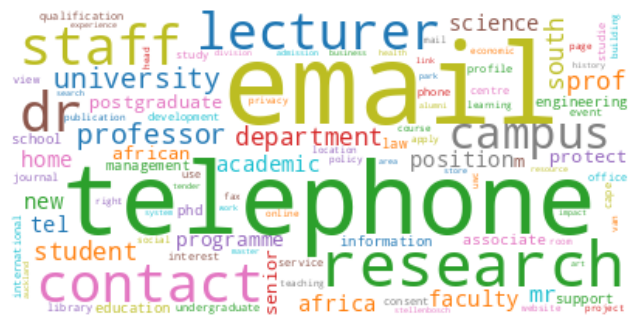

In [194]:
generate_word_cloud(staff_text, max_words=100)

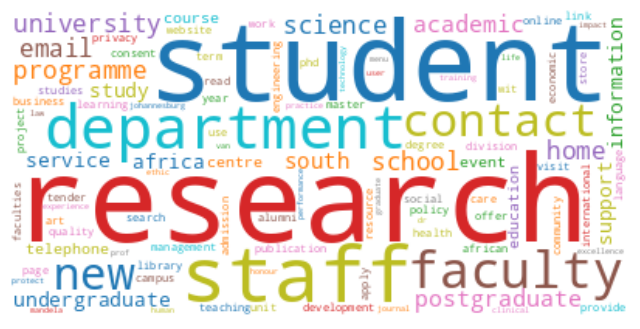

In [195]:
generate_word_cloud(non_staff_text, max_words=100)

Consider word clouds of general webpage classification tasks

In [196]:
df = pd.read_csv("/home/ahmed/CREST/Datasets/WebClassification/MultiClassWeb/website_classification.csv")

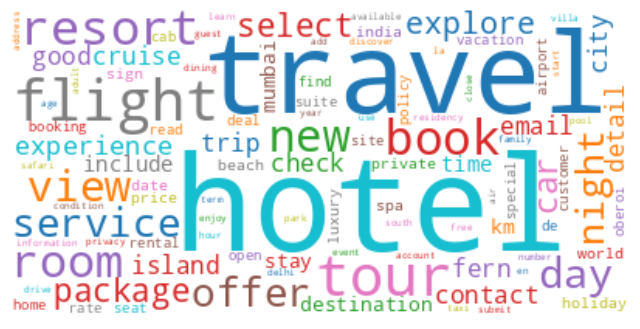

In [197]:
subset = df[df['Category'] =='Travel']
text = subset.cleaned_website_text.values
text = " ".join(text)
generate_word_cloud(text, max_words=100)

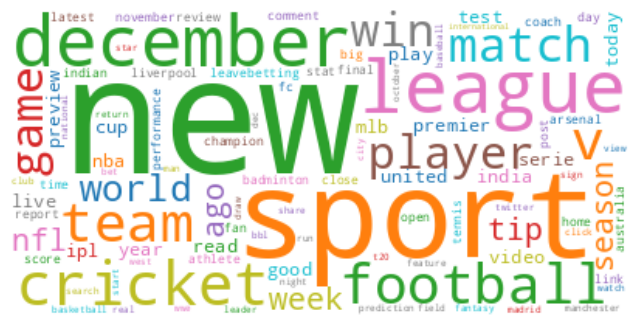

In [198]:
subset = df[df['Category'] =='Sports']
text = subset.cleaned_website_text.values
text = " ".join(text)
generate_word_cloud(text, max_words=100)

<p style='line-height:1.5; padding: 20px;'><strong>Note:</strong> Comparing the word clouds above, you can see that the academic webpage classification is harder than the general webpage classification. In the former type, the two categories share many frequent key terms whereas, in the second type, the categories have distinct key terms. </p>

In [199]:
# Check if the dataset is balanced
text_df.Label.value_counts()

0    552
1    552
Name: Label, dtype: int64

In [200]:
X_train, X_test, y_train, y_test = train_test_split(text_df['Cleaned_Text'], 
                                                    text_df['Label'], 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=text_df['Label'], 
                                                    random_state=random_state
                                                    )

In [201]:
y_train.value_counts()

0    386
1    386
Name: Label, dtype: int64

In [202]:
y_test.value_counts()

0    166
1    166
Name: Label, dtype: int64

<h2 id='svc'>SVC</h2>

SVC is inspired by <i>" novel text mining approach based on tf-idf and support vector machine for news classification"</i> cited in our manuscript.

In [203]:
# PCA will not work with the output of CountVectorizer (sparse matrix). Write  a simple estimator to deal with that
# NOTE with extremely large array this approach is not good as it will lead to high memory usage

from numpy import ndarray
from sklearn.base import BaseEstimator, TransformerMixin 
from scipy.sparse import issparse

class SparseMatrixToNumpyArray(BaseEstimator, TransformerMixin):

    def __init__(self) -> None:
        super().__init__()

    
    def fit(self, X, y=None):
        return self 
    
    def fit_transform(self, X, y = None) -> ndarray:
        if issparse(X):
            return X.toarray()
        
        return X 
    
    def transform(self, X):
        return self.fit_transform(X)

In [204]:
steps = [
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=2, max_df=1.0, use_idf=True)),
    ('clf', SVC(random_state=random_state)),
]

pipe = Pipeline(steps=steps)

In [205]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       166
           1       0.97      0.85      0.90       166

    accuracy                           0.91       332
   macro avg       0.92      0.91      0.91       332
weighted avg       0.92      0.91      0.91       332



### HyperParameter Tuning of SVC

In [206]:
steps = [
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=2, max_df=1.0, use_idf=True)),
    ('clf', SVC()),
]

param_grid = {
    'clf__C': [0.1, 1.0, 10.0, 100.0],
    'clf__kernel': ['poly', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto'],
    'clf__random_state': [random_state],
}

pipe = Pipeline(steps=steps)

In [207]:
search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring=scoring, n_jobs=4, refit=True, return_train_score=True, verbose=1)

In [208]:
_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


In [209]:
display_search_result(search)

,param_clf__C,param_clf__gamma,param_clf__kernel,param_clf__random_state,mean_test_score,rank_test_score
0,0.10,scale,poly,42,0.52,12
1,0.10,scale,rbf,42,0.80,11
2,0.10,scale,sigmoid,42,0.82,9
3,0.10,auto,poly,42,0.33,14
4,0.10,auto,rbf,42,0.33,14
5,0.10,auto,sigmoid,42,0.33,14
6,1.00,scale,poly,42,0.80,10
7,1.00,scale,rbf,42,0.89,6
8,1.00,scale,sigmoid,42,0.92,3
9,1.00,auto,poly,42,0.33,14


In [210]:
print(search.best_estimator_)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=2)),
                ('clf', SVC(C=10.0, kernel='sigmoid', random_state=42))])


In [211]:
search.best_params_

{'clf__C': 10.0,
 'clf__gamma': 'scale',
 'clf__kernel': 'sigmoid',
 'clf__random_state': 42}

Evaluate SVC on the test

In [212]:
_ = search.best_estimator_.fit(X_train, y_train)

In [213]:
y_pred = search.best_estimator_.predict(X_test)

In [214]:
print(classification_report(y_test, y_pred,  target_names=["Not Staff", "Staff"]))

              precision    recall  f1-score   support

   Not Staff       0.96      0.92      0.94       166
       Staff       0.92      0.96      0.94       166

    accuracy                           0.94       332
   macro avg       0.94      0.94      0.94       332
weighted avg       0.94      0.94      0.94       332



**<span style='color:red;'>Evaluate SVC using 21 independent runs with different seeds</span>**

In [215]:
svc_scores = evaluate_estimator(search.best_estimator_, X_train, X_test, y_train, y_test)

Stochastic Estimator
Running in parallel


In [216]:
print_classification_report(svc_scores)

Class               Precision           Recall              F1                  
0                   0.92                0.96                0.94                
1                   0.96                0.92                0.94                

Average accuracy    0.94
Average precision   0.94
Average recall      0.94
Average f1 score    0.94


In [217]:
svc_cv_times = measure_cv_time(search.best_estimator_, text_df['Cleaned_Text'].values, text_df.Label.values)

20% - 30% - 40% - 50% - 60% - 70% - 80% - 90% - 100% - 


<h2 id='wpcm'>Replicating WPCM</h2>

Replicating <i>"web page feature selection and classification using neural networks"</i> cited in our manuscript.

In [218]:
class EntropyVectorizer(CountVectorizer):
    """Entropy vectorizer based on the paper cited above."""

    def __init__(self, *, n_terms=50, min_df=1, max_df=1.0) -> None:
        """Initialize the entropy vectorizer
        
        Parameters
        ----------
        n_terms: int
            the number of 'regular' terms
        min_df: int or float
            the min_df parameter of TFIDF vectorizer
        max_df: int or float
            the max_df parameter of the TFIDF vectorizer"""
        
        super().__init__(min_df=min_df, max_df=max_df)
        # Number of terms that are 'regular' in each class. The paper used n_terms = 50
        self.n_terms = n_terms 
        # The terms
        self.selected_terms = [] 
        # Terms per class
        self.selected_terms_per_class = {}

        # NOTE the following attribute should only be computed during training (fit) and should be 
        # reused during testing (transform). We follow the notation of the paper so
        # F_K : the frequency of term k in the entire document collection
        # n   : the number of documents in the collection
        self.n = None
        self.F_k = None


    def fit(self, raw_doc, y=None):
        """Override the parent fit method
        
        Parameters
        ----------
        row_doc: 
            an iterable of the raw documents in a collection
        y:
            the labels"""

        if not isinstance(raw_doc, np.ndarray):
            raw_doc = np.array(raw_doc)

        if not isinstance(y, np.ndarray):
            y = np.array(y)

        # Start from scratch
        self.n = None
        self.F_k = None
        self.selected_terms = [] 
        self.selected_terms_per_class = {}
        
        # First, choose the 'regular' term in each class
        # NOTE in the paper, the authors chose these manually. We opted for automated selection to be fair
        labels = np.unique(y)
        r =int(max(self.n_terms/len(labels), 1))
        q = self.n_terms % len(labels)

        for label in labels:
            n_terms_per_label = r + 1 if q > 0 else r 
            q -= 1
            
            # Select documents from the chosen class
            raw_doc_label = raw_doc[y == label]

            # Compute the document term frequency
            X_freq = super().fit_transform(raw_doc_label)

            # Find the most frequent terms and update self.selected_terms in place
            self.find_max_freq_terms(label, X_freq, n_terms_per_label)
        
        # NOTE Fitting the entropy must be the last step to ensure that the vocabulary of the  super 
        # class will be correct. This is because we used the super class to calculate the frequency 
        # in each category before this step.
        
        # Fit entropy
        X_freq = super().fit_transform(raw_doc).toarray()

        # Find and fix n for training and testing
        self.n, _ = X_freq.shape

        # Find the indices of the selected term in order to calculate their entropy later
        feature_names = super().get_feature_names_out()
        feature_indices = np.where(np.isin(feature_names, self.selected_terms))[0]
        X_freq = X_freq[:, feature_indices]
        assert X_freq.shape[1] == len(self.selected_terms)

        # Find and fix F_k for training and testing
        self.F_k = np.sum(X_freq, axis=0)

        return self


    def fit_transform(self, raw_doc, y=None):
        self.fit(raw_doc, y)
        return self.transform(raw_doc)


    def transform(self, raw_doc):

        if self.F_k is None and self.n is None:
            raise NotFittedError(f"{self.__class__.__name__} object is not fitted")
        
        X_freq = super().transform(raw_doc).toarray()

        # Compute the entropy for max-entropy terms only
        feature_names = super().get_feature_names_out()
        feature_indices = np.where(np.isin(feature_names, self.selected_terms))[0]
        X_freq = X_freq[:, feature_indices]
        assert X_freq.shape[1] == len(self.selected_terms)

        if np.all(X_freq == 0):
            print("All zeros")
        # NOTE: we follow the paper notation. Therefore,
        # L_jk: is the local weighting
        # G_k : is the global weighting

        # Compute the local weighting of term k in every document
        L_jk = np.zeros_like(X_freq)
        L_jk[X_freq > 0] = 1 + np.log(X_freq[X_freq > 0])

        # NOTE the line commented below is equiv. of the two lines above. However, it gives warning 
        # encountering zero in np.log
        # L_jk = np.where(X_freq > 0, 1 + np.log(X_freq), X_freq)

        # Just checking we are fine!
        if np.isnan(L_jk).any() or np.isinf(L_jk).any():
            warnings.warn("np.nan or np.inf in L_jk", RuntimeWarning)


        # Compute the global weighting
        n = self.n
        F_k = self.F_k
        assert F_k.size == X_freq.shape[1]

        r = X_freq / F_k 
        G_k = np.zeros_like(r)
        G_k[r > 0] = r[r > 0] * np.log(r[r > 0])
        G_k = 1 + np.sum(G_k, axis=0)
        G_k = G_k / np.log(n)

        # NOTE the line commented below is equiv. of the 4 lines above. However, it gives warning encountering zero in np.log
        # G_k = (1 + np.sum(np.where(r != 0, r * np.log(r), r), axis=0))/np.log(n)

        # More checks
        assert G_k.size == X_freq.shape[1]
        if np.isnan(G_k).any() or np.isinf(G_k).any():
            warnings.warn("np.nan or np.inf in L_jk", RuntimeWarning)

        # Compute entropy 
        X_entropy = L_jk * G_k 
        assert X_entropy.shape == (len(raw_doc), len(self.selected_terms))

        return X_entropy

        
    def find_max_freq_terms(self, label, X_freq, n_terms):
        self.selected_terms_per_class[label] = []
        feature_names = super().get_feature_names_out()
        term_freq = np.ravel(np.sum(X_freq, axis=0))
        assert term_freq.size == feature_names.size 
        
        # NOTE this is very slow as we need to sort the entire array only to pull a few elements!
        # indexes = np.argsort(term_freq)[::-1]

        # We choose the (2*n_terms) terms with the largest count since some of the largest n_terms
        # might already be selected from another class. In this case, we need to skip them and consider
        # the next largest term
        # Get the indexes of the n largest elements using partition
        indexes = np.argpartition(term_freq, -2*n_terms)[-2*n_terms:]
        # Sort the selected indexes based on the original order of the n largest elements
        indexes = indexes[np.argsort(term_freq[indexes])][::-1]

        count = 0
        for idx in indexes:
            if count == n_terms:
                break 
            
            # NOTE the same term can be added from different classes. Check to avoid duplicated terms
            if feature_names[idx] in self.selected_terms:
                continue 
            
            term = feature_names[idx]
            self.selected_terms.append(term)
            self.selected_terms_per_class[label].append(term)
            count += 1

    
    def get_selected_terms(self):
        if not self.selected_terms or not any(self.selected_terms):
            raise NotFittedError(f"{self.__class__.__name__} objected is not fitted")
        
        return self.selected_terms
    
    
    def get_selected_terms_per_class(self):
        if not self.selected_terms_per_class or not any([x for x in self.selected_terms_per_class.values() if x]):
            raise NotFittedError(f"{self.__class__.__name__} objected is not fitted") 
        
        return self.selected_terms_per_class
    
    def get_selected_indexes_per_class(self):
        if not self.selected_terms_per_class or not any([x for x in self.selected_terms_per_class.values() if x]):
            raise NotFittedError(f"{self.__class__.__name__} objected is not fitted") 
        
        orig_idx_label = {}
        indexes = []
        feature_names = super().get_feature_names_out()
        for label, terms in self.selected_terms_per_class.items():
            orig_idx_label[label] = np.where(np.isin(feature_names, terms))[0]
            indexes += list(orig_idx_label[label])
        
        indexes.sort()
        index_dict = {orig_idx: new_idx for new_idx, orig_idx in enumerate(indexes)}
        indexes_per_label = {}
        for label in orig_idx_label.keys():
            indexes_per_label[label] = [new_idx for orig_idx, new_idx in index_dict.items() if orig_idx in orig_idx_label[label]]

        return indexes_per_label

In [219]:
entropy_vec = EntropyVectorizer(n_terms=40)
X = entropy_vec.fit_transform(X_train, y_train)

In [220]:
# The selected terms for each class
pd.DataFrame(entropy_vec.get_selected_terms_per_class()).rename(columns={0: 'Non-Staff', 1: 'Staff'})

,Non-Staff,Staff
0,research,telephone
1,cookie,dr
2,student,lecturer
3,staff,campus
4,faculty,professor
5,contact,prof
6,department,position
7,email,african
8,university,management
9,home,mr


Looks good!

Examine the distribution of average entropy across the samples in the training set for staff and non-staff

In [221]:
idx_per_label = entropy_vec.get_selected_indexes_per_class()

In [222]:
X0 = X[y_train == 0]
X1 = X[y_train == 1]
X0 = X0.mean(axis=0)
X1 = X1.mean(axis=0)


In [223]:
# fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(8, 4))
# cmap = plt.get_cmap("tab20b")
# N, bins, patches = ax0.hist(X0, bins=20)
# for i in range(len(N)):
#     patches[i].set_facecolor(cmap(i))

# ax0.set_title("Non-Staff Pages", fontdict={'color': 'grey'})

# N, bins, patches = ax1.hist(X1, bins=20)
# for i in range(len(N)):
#     patches[i].set_facecolor(cmap(i))

# ax1.set_title("Staff Pages", fontdict={'color': 'grey'})
# plt.tight_layout()
# plt.show()

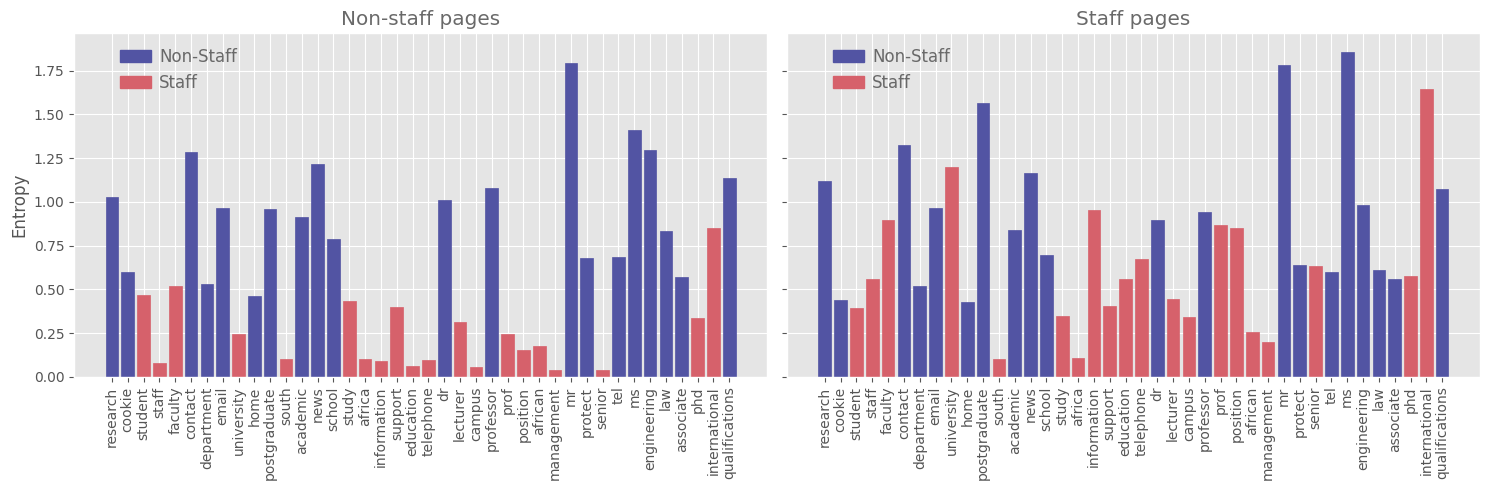

In [224]:
indexes_per_label = entropy_vec.get_selected_indexes_per_class()
# terms_per_label = entropy_vec.get_selected_terms_per_class()


def plot_bar(ax, X, title):
    colors = generate_colors(20, colormap='tab20b', alpha=1.0)
    color1 = colors[1] # Label 0
    color2 = colors[-6] # Label 1

    # The terms corresponds to the correct indexes
    terms = entropy_vec.get_selected_terms()

    bars = ax.bar(range(len(X)), np.abs(X))

    for idx, bar in enumerate(bars):
        if idx in indexes_per_label[0]:
            bar.set_color(color1)
        elif idx in indexes_per_label[1]:
            bar.set_color(color2)
        else:
            raise RuntimeError("Unknown term")
    
    ax.set_title(title, color='dimgray')
    ax.set_xticks(range(len(X)))
    ax.set_xticklabels(terms, rotation=90)

    # Manually create a legened
    box1 = patches.Rectangle((0.5, 1.8), 2, 0.07, linewidth=1, edgecolor=color1, facecolor=color1)
    box2 = patches.Rectangle((0.5, 1.65), 2, 0.07, linewidth=1, edgecolor=color2, facecolor=color2)
    ax.add_patch(box1)
    ax.add_patch(box2)
    ax.text(3, 1.8, "Non-Staff", color='dimgray', fontsize=12)
    ax.text(3, 1.65, "Staff", color='dimgray', fontsize=12)





fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
plot_bar(axs[0], X0, "Non-staff pages")
plot_bar(axs[1], X1, "Staff pages")
axs[0].set_ylabel("Entropy")
plt.tight_layout()


In [225]:
# import matplotlib.patches as patches
# fig, ax = plt.subplots()

# # Draw the red rectangle
# red_rectangle = patches.Rectangle((0.1, 0.7), 0.1, 0.05, linewidth=1, edgecolor='r', facecolor='r')
# ax.add_patch(red_rectangle)

# # Draw the blue rectangle
# blue_rectangle = patches.Rectangle((0.1, 0.5), 0.1, 0.05, linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(blue_rectangle)

# # Add labels next to the rectangles
# ax.text(0.25, 0.75, "Red", color='dimgray', fontsize=12)
# ax.text(0.25, 0.55, "Blue", color='dimgray', fontsize=12)

**The paper used slightly different formula for TFIDF compared to that used in Scikit-Learn.** Therefore, we implment a custom TFIDF to replicate the paper.

In [226]:
from typing import Literal
from numpy import ndarray
import scipy.sparse as sp
from scipy.sparse import spmatrix

def _document_frequency(X):
    """NOTE Copied from Scikit-Learn source code"""
    if sp.isspmatrix_csr(X):
        return np.bincount(X.indices, minlength=X.shape[1])
    else:
        return np.diff(X.indptr)

class CustomTfidfTransformer(TfidfTransformer):
    """A custom TFIDF transformer since the paper used a slightly different formula than that of Scikit-Learn
    
    NOTE: copied from Scikit-Learn and modified to match the formula used in the paper"""

    def __init__(self, *, norm: Literal['l1', 'l2'] | None = "l2", use_idf: bool = True, smooth_idf: bool = True, sublinear_tf: bool = False) -> None:
        super().__init__(norm=norm, use_idf=use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf)

    def fit(self, X, y=None):

        if not sp.issparse(X):
            X = sp.csr_matrix(X)
            
        dtype = np.float64

        if self.use_idf:
            n_samples, n_features = X.shape
            df = _document_frequency(X)
            df = df.astype(dtype, copy=False)

            # perform idf smoothing if required
            df += int(self.smooth_idf)
            n_samples += int(self.smooth_idf)

            # NOTE This is the KEY difference between the paper and sklearn
            idf = np.log(n_samples / df)
            self._idf_diag = sp.diags(
                idf,
                offsets=0,
                shape=(n_features, n_features),
                format="csr",
                dtype=dtype,
            )

        return self
    
    def fit_transform(self, X, y = None, **fit_params) -> ndarray:
        return super().fit_transform(X, y, **fit_params)
    
    def transform(self, X, copy: bool = True) -> spmatrix:
        return super().transform(X, copy)

`PCAEntropyEstimator` below is the vectorizer that will performs the two feature engineering steps used in the paper:

1. Compute the entropy of the _regular_ terms

2. Compute the TFIDF followed by PCA

In [227]:
from sklearn.base import BaseEstimator, TransformerMixin

class PCAEntropyEstimator(BaseEstimator, TransformerMixin):

    def __init__(self, max_features: int = 1800, n_components: int = 600, n_terms: int = 50, random_state=random_state) -> None:
        super().__init__()
        self.max_features = max_features
        self.n_components = n_components
        self.n_terms = n_terms
        self.random_state = random_state
        self.count_vec = CountVectorizer(max_features=self.max_features)
        self.tfidf_vec = CustomTfidfTransformer(use_idf=True, smooth_idf=False, sublinear_tf=False)
        self.pca = PCA(n_components=self.n_components, random_state=self.random_state)
        self.entropy_vec = EntropyVectorizer(n_terms=self.n_terms)

    def fit(self, raw_doc, y=None):
        if not self.count_vec:
            self.count_vec = CountVectorizer(max_features=self.max_features)

        if not self.pca:
            self.pca = PCA(n_components=self.n_components, random_state=self.random_state)

        self.count_vec.fit(raw_doc, y)
        self.entropy_vec.fit(raw_doc, y)
        # Skip self.tfidf and self.pca_ since it cannot learn from a raw_doc. Do that later in fit_transform

        return self 
    
    def fit_transform(self, raw_doc, y):

        if not self.count_vec:
            self.count_vec = CountVectorizer(max_features=self.max_features)

        if not self.pca:
            self.pca = PCA(n_components=self.n_components, random_state=self.random_state)

        if not self.entropy_vec:
            self.entropy_vec = EntropyVectorizer(n_terms=self.n_terms)

        X = self.count_vec.fit_transform(raw_doc)
        X = self.tfidf_vec.fit_transform(X, y).toarray()
        X = self.pca.fit_transform(X, y)
        X_entropy = self.entropy_vec.fit_transform(raw_doc, y)
        X = np.hstack((X, X_entropy))
        return X
    
    def transform(self, raw_doc):
        X = self.count_vec.transform(raw_doc)
        X = self.tfidf_vec.transform(X).toarray()
        X = self.pca.transform(X)
        X_entropy = self.entropy_vec.transform(raw_doc)
        X = np.hstack((X, X_entropy))
        return X
    
    # Define the serialization in __getstate__ and __setstate for pickling to be used in MP
    def __getstate__(self):
        state = self.__dict__.copy()
        del state['count_vec'] 
        del state['tfidf_vec'] 
        del state['pca']
        del state['entropy_vec']
        return state
    

    def __setstate__(self, state) -> None:
        self.__dict__.update(state)
        # NOTE we will set these later in the fit and fit_transform. GridSearchCV will set the 
        # parameter before this step so it will override
        self.count_vec = None
        self.pca = None
        self.entropy_vec = None

        # tfidf_vec is fine as it will need no parameters from the GridSearchCV
        self.tfidf_vec = CustomTfidfTransformer(use_idf=True, smooth_idf=False, sublinear_tf=False)
        # random_state will be inherited in every process since every process will inherit the 
        # current state of the main process
        

Let us use the settings used in the paper as _baseline configurations_ which we will improve later

In [228]:
pipe = Pipeline(
    steps=[
        ('preprocess', PCAEntropyEstimator(max_features=1800, n_components=600, n_terms=50)), 
        ('cls', MLPClassifier(hidden_layer_sizes=(50,), 
                              solver='sgd', 
                              learning_rate_init=0.005, 
                              momentum=0.001, 
                              max_iter=1000, 
                              random_state=random_state))
    ])

In [229]:
_ = pipe.fit(X_train, y_train)

In [230]:
y_pred = pipe.predict(X_test)

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       166
           1       0.97      0.84      0.90       166

    accuracy                           0.91       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.91      0.91      0.91       332



### EntropyPCA Hyperparameter Tuning

In [232]:
steps = [
    ('pca_entropy', PCAEntropyEstimator()), 
    ('clf', MLPClassifier())
    ]

param_grid = {
    'pca_entropy__n_components': [50, 100, 200], # Most of the variance is explained by the first dozen principle components
    'pca_entropy__n_terms': [20, 50, 100], # 50 used in the paper
    'pca_entropy__max_features': [1800], # Used in the paper. Not the most significant hyperparameter unless using extremely low/large values
    'clf__hidden_layer_sizes': [(50,), (100,)], 
    'clf__learning_rate_init': [5e-3, 1e-2], # 5e-3 used in the paper
    'clf__momentum': [1e-3, 0.5, 0.9], # 1e-3 used in the paper
    'clf__solver': ['sgd'], # Used in the paper
    'clf__random_state': [random_state],
    'clf__max_iter': [1000, 2000], # 1000 used in the paper
    
}

pipe = Pipeline(steps=steps)

In [233]:
search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=4, n_jobs=4, verbose=1, return_train_score=True, refit=True, scoring=scoring)

In [234]:
_  = search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


/home/ahmed/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmed/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmed/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmed/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahmed/env/lib/python3.10/site-packages/sklearn/neural_

In [235]:
print(search.best_estimator_)

Pipeline(steps=[('pca_entropy',
                 PCAEntropyEstimator(n_components=200, n_terms=100)),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=(50,),
                               learning_rate_init=0.01, max_iter=1000,
                               random_state=42, solver='sgd'))])


In [236]:
search.best_params_

{'clf__hidden_layer_sizes': (50,),
 'clf__learning_rate_init': 0.01,
 'clf__max_iter': 1000,
 'clf__momentum': 0.9,
 'clf__random_state': 42,
 'clf__solver': 'sgd',
 'pca_entropy__max_features': 1800,
 'pca_entropy__n_components': 200,
 'pca_entropy__n_terms': 100}

In [237]:
search.best_score_

0.883688647070747

In [238]:
_ = search.best_estimator_.fit(X_train, y_train)

In [239]:
y_pred = search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Non-Staff', 'Staff']))

              precision    recall  f1-score   support

   Non-Staff       0.91      0.95      0.93       166
       Staff       0.95      0.91      0.93       166

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



In [240]:
# Avoid running hyperparameter tuning again
steps = [
    ('pca_entropy', PCAEntropyEstimator(max_features=1800, n_terms=100, n_components=200)), 
    ('clf', MLPClassifier(hidden_layer_sizes=(50,), 
                          solver='sgd', 
                          learning_rate_init=0.01,
                          momentum=0.9, 
                          max_iter=1000, 
                          random_state=random_state))
]

entropy_est = Pipeline(steps=steps)

In [241]:
_ = entropy_est.fit(X_train, y_train)

In [242]:
y_pred = entropy_est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       166
           1       0.95      0.91      0.93       166

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



**<span style='color:red;'>Evaluate WPCM using 21 independent runs with different seeds</span>**

In [243]:
entropy_scores = evaluate_estimator(entropy_est, X_train, X_test, y_train, y_test)

Stochastic Estimator
Running in parallel


In [244]:
print_classification_report(entropy_scores)

Class               Precision           Recall              F1                  
0                   0.95                0.9                 0.93                
1                   0.89                0.95                0.92                

Average accuracy    0.92
Average precision   0.92
Average recall      0.92
Average f1 score    0.92


In [245]:
entopy_cv_times = measure_cv_time(entropy_est, text_df['Cleaned_Text'].values, text_df.Label.values)

20% - 30% - 40% - 50% - 60% - 70% - 80% - 90% - 100% - 


<h2 id='google'>Replicating Google Text Classification Guide</h2>

Replicating the method of Google Machine Learning Guide (<a href="https://developers.google.com/machine-learning/guides/text-classification">here</a>).

In [246]:
steps = [
    ('vec', TfidfVectorizer(ngram_range=(1, 2), dtype='float32', decode_error='replace', analyzer='word', min_df=2)),
    ('fselect', SelectKBest(f_classif, k=1000)),
]

In [247]:
pipe = Pipeline(steps=steps)

In [248]:
from tensorflow import keras # has to do this again!
tf.random.set_seed(random_state)


def build_model(meta, layers=1, units=32, dropout_rate=0.2, learning_rate=1e-2):
    # print(f"layer = {layers}\tunits = {units}\tdropout_rate = {dropout_rate}")
    n_features = meta["n_features_in_"]
    n_classes = meta["n_classes_"]
    model = keras.models.Sequential()
    # model.add(keras.layers.Dropout(rate=dropout_rate, input_shape=(n_features,)))
    model.add(keras.layers.Input(shape=(n_features,)))

    for _ in range(layers):
        model.add(keras.layers.Dense(units=units, activation='relu'))
        model.add(keras.layers.Dropout(rate=dropout_rate))
    
    # The last layer
    if n_classes == 2:
        op_units = 1
        activation = 'sigmoid' 
    else:
        op_units = n_classes 
        activation = 'softmax' 

    model.add(keras.layers.Dense(units=op_units, activation=activation))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = 'binary_crossentropy' if n_classes == 2 else 'sparse_categorical_crossentropy'

    model.compile(optimizer=optimizer, loss=loss)

    return model

### Google MLP Hyperparameter Tuning

In [249]:
steps = [
    ('vec', TfidfVectorizer(ngram_range=(1, 2), decode_error='replace', analyzer='word', min_df=2)),
    ('fselect', SelectKBest(f_classif, k=1000)),
    ('clf',  KerasClassifier(model=build_model, verbose=0))
]

param_grid = {
    'fselect__k': [1000, 10000, 20000], # 20,000 recommened in Google Developer Guide
    'clf__model__layers': [1, 2, 3], # Given as choices in Google ML Guide
    'clf__model__units': [32, 64], # 32/64 are recommended
    'clf__model__dropout_rate': [0.2, 0.3, 0.4], # Recommended range [0.2, 0.5]
    'clf__model__learning_rate': [1e-3, 1e-2],
    'clf__random_state': [random_state],

}

pipe = Pipeline(steps=steps)

In [250]:
search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=4, n_jobs=4, verbose=1, return_train_score=True, refit=True, scoring=scoring)

In [251]:
_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


2023-10-05 11:42:36.455157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 11:42:36.641560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 11:42:36.677387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 11:42:36.713799: I tensorflow/core/platform/cpu_featu

In [252]:
print(search.best_estimator_)

Pipeline(steps=[('vec',
                 TfidfVectorizer(decode_error='replace', min_df=2,
                                 ngram_range=(1, 2))),
                ('fselect', SelectKBest(k=10000)),
                ('clf',
                 KerasClassifier(model=<function build_model at 0x7ff276248a60>, model__dropout_rate=0.2, model__layers=1, model__learning_rate=0.01, model__units=64, random_state=42, verbose=0))])


In [253]:
search.best_params_

{'clf__model__dropout_rate': 0.2,
 'clf__model__layers': 1,
 'clf__model__learning_rate': 0.01,
 'clf__model__units': 64,
 'clf__random_state': 42,
 'fselect__k': 10000}

In [254]:
# Avoid re-runing the grid search
steps = [
    ('vec', TfidfVectorizer(ngram_range=(1, 2), decode_error='replace', analyzer='word', min_df=2)),
    ('fselect', SelectKBest(f_classif, k=10000)),
    ('clf',  KerasClassifier(model=build_model, layers=1, units=64, dropout_rate=0.2, learning_rate=1e-2, verbose=0, random_state=random_state))
]
google_est = Pipeline(steps=steps)

In [255]:
_ = google_est.fit(X_train, y_train)

In [256]:
y_pred = google_est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       166
           1       0.95      0.90      0.92       166

    accuracy                           0.92       332
   macro avg       0.93      0.92      0.92       332
weighted avg       0.93      0.92      0.92       332



**<span style='color:red;'>Evaluate Google method using 21 independent runs with different seeds</span>**

In [257]:
google_scores = evaluate_estimator(google_est, X_train, X_test, y_train, y_test, parallel=False)

Stochastic Estimator
Running sequentially
5% - 10% - 14% - 19% - 24% - 29% - 33% - 38% - 43% - 48% - 52% - 57% - 62% - 67% - 71% - 76% - 81% - 86% - 90% - 95% - 100% - 


In [258]:
print_classification_report(google_scores)

Class               Precision           Recall              F1                  
0                   0.94                0.95                0.95                
1                   0.95                0.94                0.95                

Average accuracy    0.95
Average precision   0.94
Average recall      0.94
Average f1 score    0.95


In [259]:
google_cv_times = measure_cv_time(google_est, text_df['Cleaned_Text'].values, text_df.Label.values)

20% - 30% - 40% - 50% - 60% - 70% - 80% - 90% - 100% - 


<h1 id='cv'>Cross-Validation Computational Time</h1>

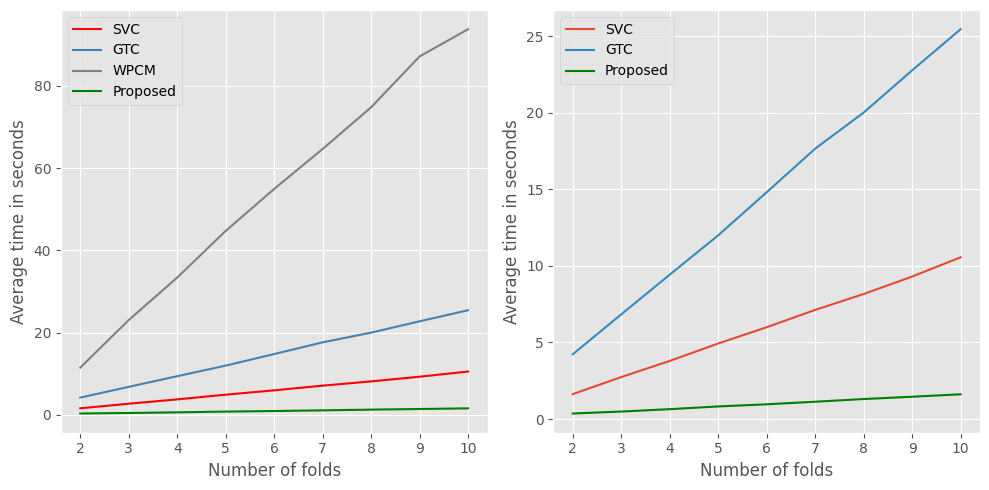

In [260]:
x = range(2, len(svc_cv_times)+2)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x, svc_cv_times, color='red', label='SVC')
axs[0].plot(x, google_cv_times, color='steelblue', label='GTC')
axs[0].plot(x, entopy_cv_times, color='gray', label='WPCM')
axs[0].plot(x, rf_est_cv_times, color='green', label='Proposed')
axs[0].set_xlabel("Number of folds")
axs[0].set_ylabel("Average time in seconds")
axs[0].legend()

axs[1].plot(x, svc_cv_times, label='SVC')
axs[1].plot(x, google_cv_times, label='GTC')
axs[1].plot(x, rf_est_cv_times, color='green', label='Proposed')
axs[1].set_xlabel("Number of folds")
axs[1].set_ylabel("Average time in seconds")
axs[1].legend()

plt.tight_layout()